<a href="https://colab.research.google.com/github/somewhereverywhere/customer_segmentation/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate



# Define the file path
file_path = '/content/drive/My Drive/Superstore Marketing Data.csv'

try:
    # Read the JSON file into a DataFrame
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print("An error occurred:", e)

File loaded successfully!


In [ ]:
# Display the first few rows of the DataFrame
df.head()

# Basic information about the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [ ]:
df.dropna(subset=['Income'], inplace=True)


In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a dictionary to store the results
stats_summary = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Variance': [],
    'Std Dev': []
}

# Calculate the statistics for each numerical column
for var in numerical_cols:
    mean_val = df[var].mean()
    median_val = df[var].median()
    mode_val = df[var].mode()[0] if not df[var].mode().empty else None
    variance_val = df[var].var()
    std_dev_val = df[var].std()

    stats_summary['Variable'].append(var)
    stats_summary['Mean'].append(mean_val)
    stats_summary['Median'].append(median_val)
    stats_summary['Mode'].append(mode_val)
    stats_summary['Variance'].append(variance_val)
    stats_summary['Std Dev'].append(std_dev_val)

# Convert the dictionary to a DataFrame for better visualization
stats_summary_df = pd.DataFrame(stats_summary)

# Define the function to print a formatted table
def table1(df, headers):
    return tabulate(df, headers=headers, tablefmt='fancy_grid')

# Print the stats summary table
headers = ['Variable', 'Mean', 'Median', 'Mode', 'Variance', 'Std Dev']
table = table1(stats_summary_df, headers)
print(table)

# Optionally, print the stats_summary_df as a DataFrame
print(stats_summary_df)


╒════╤═════════════════════╤════════════════╤══════════╤════════╤══════════════════╤══════════════╕
│    │ Variable            │           Mean │   Median │   Mode │         Variance │      Std Dev │
╞════╪═════════════════════╪════════════════╪══════════╪════════╪══════════════════╪══════════════╡
│  0 │ Id                  │  5588.35       │   5458.5 │      0 │      1.05584e+07 │  3249.38     │
├────┼─────────────────────┼────────────────┼──────────┼────────┼──────────────────┼──────────────┤
│  1 │ Year_Birth          │  1968.82       │   1970   │   1976 │    143.654       │    11.9856   │
├────┼─────────────────────┼────────────────┼──────────┼────────┼──────────────────┼──────────────┤
│  2 │ Income              │ 52247.3        │  51381.5 │   7500 │      6.33684e+08 │ 25173.1      │
├────┼─────────────────────┼────────────────┼──────────┼────────┼──────────────────┼──────────────┤
│  3 │ Kidhome             │     0.441787   │      0   │      0 │      0.288258    │     0.536896 │


In [ ]:
from scipy.stats import zscore


#Define the columns of interest
columns_of_interest = ['Income', 'MntFishProducts', 'MntMeatProducts',
                       'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds',
                       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

# Initialize a dictionary to hold results
results = {}

for column in columns_of_interest:
    col_data = df[column]

    # Calculate central tendency
    mean_value = col_data.mean()
    median_value = col_data.median()
    mode_value = col_data.mode()[0] if not col_data.mode().empty else None

    # Calculate dispersion
    variance_value = col_data.var()
    std_dev_value = col_data.std()

    # Detect outliers using Z-Score
    col_zscore = zscore(col_data)
    z_score_threshold = 3
    outliers_z = df[abs(col_zscore) > z_score_threshold][column]

    # Detect outliers using IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_low = Q1 - 1.5 * IQR
    outlier_threshold_high = Q3 + 1.5 * IQR
    outliers_iqr = df[(col_data < outlier_threshold_low) | (col_data > outlier_threshold_high)][column]

    # Store results
    results[column] = {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value,
        'variance': variance_value,
        'std_dev': std_dev_value,
        'outliers_z': outliers_z.tolist(),
        'outliers_iqr': outliers_iqr.tolist()
    }

# Display the results
for column, stats in results.items():
    print(f"Column: {column}")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['median']}")
    print(f"Mode: {stats['mode']}")
    print(f"Variance: {stats['variance']}")
    print(f"Standard Deviation: {stats['std_dev']}")
    print(f"Outliers (Z-Score Method): {stats['outliers_z']}")
    print(f"Outliers (IQR Method): {stats['outliers_iqr']}")
    print("-" * 40)




Column: Income
Mean: 52247.25135379061
Median: 51381.5
Mode: 7500.0
Variance: 633683788.575619
Standard Deviation: 25173.076660901403
Outliers (Z-Score Method): [157146.0, 160803.0, 666666.0, 162397.0, 157733.0, 153924.0, 156924.0, 157243.0]
Outliers (IQR Method): [157146.0, 160803.0, 666666.0, 162397.0, 157733.0, 153924.0, 156924.0, 157243.0]
----------------------------------------
Column: MntFishProducts
Mean: 37.63763537906137
Median: 12.0
Mode: 0
Variance: 2997.7905287627023
Standard Deviation: 54.75208241485161
Outliers (Z-Score Method): [240, 224, 205, 229, 259, 218, 247, 216, 207, 224, 219, 242, 234, 234, 253, 258, 258, 227, 250, 232, 216, 216, 202, 202, 202, 219, 210, 205, 205, 250, 224, 237, 231, 220, 212, 224, 208, 254, 220, 246, 227, 240, 223, 210, 210, 210, 220, 220, 237, 225, 258, 212, 219, 219, 208, 207, 250, 210]
Outliers (IQR Method): [240, 138, 189, 224, 150, 134, 193, 180, 140, 137, 168, 205, 172, 150, 150, 229, 259, 127, 134, 130, 145, 218, 247, 124, 124, 185, 182, 

##Visualization of Original Data

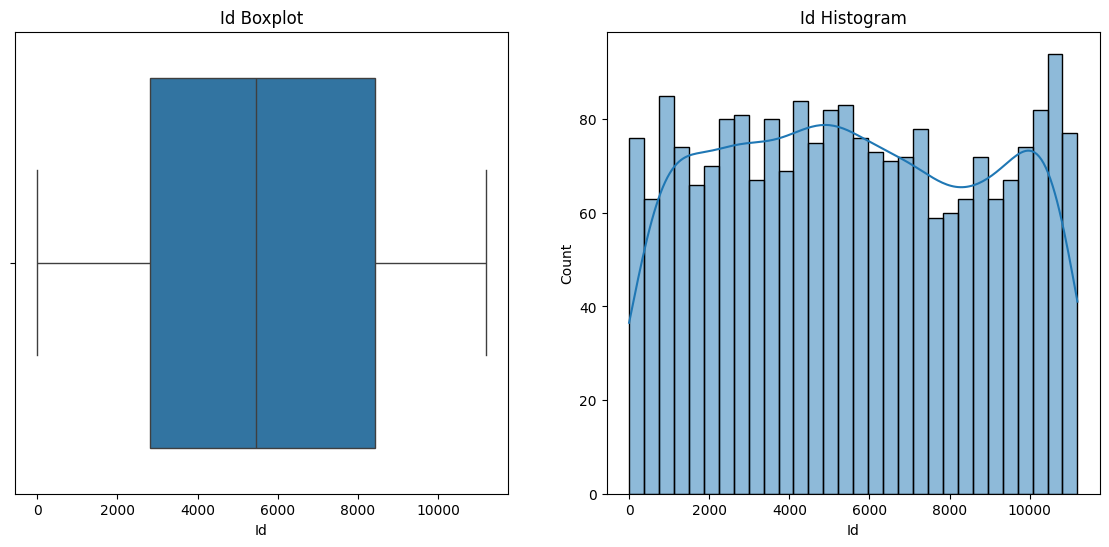

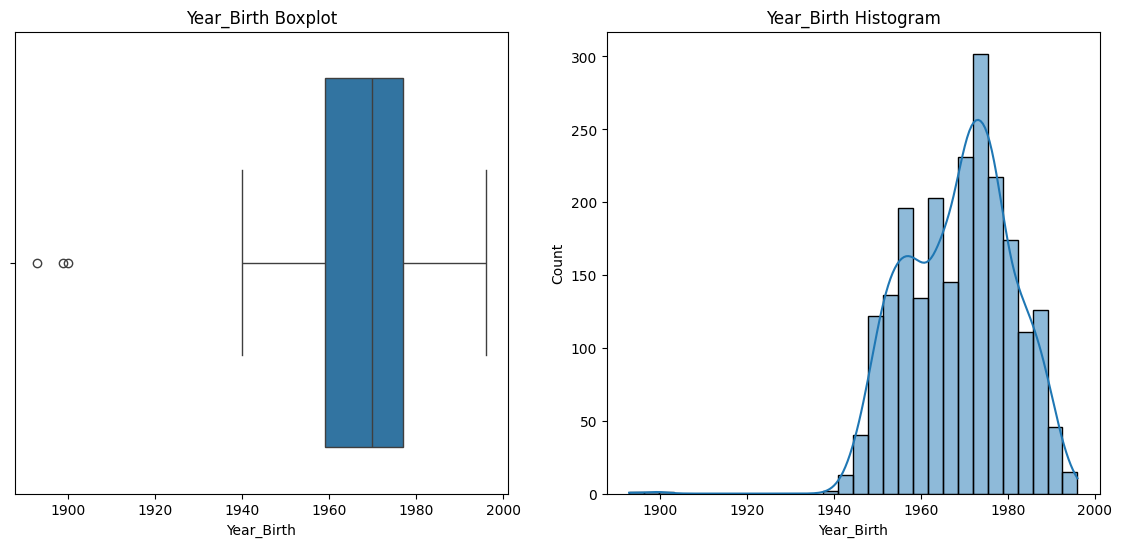

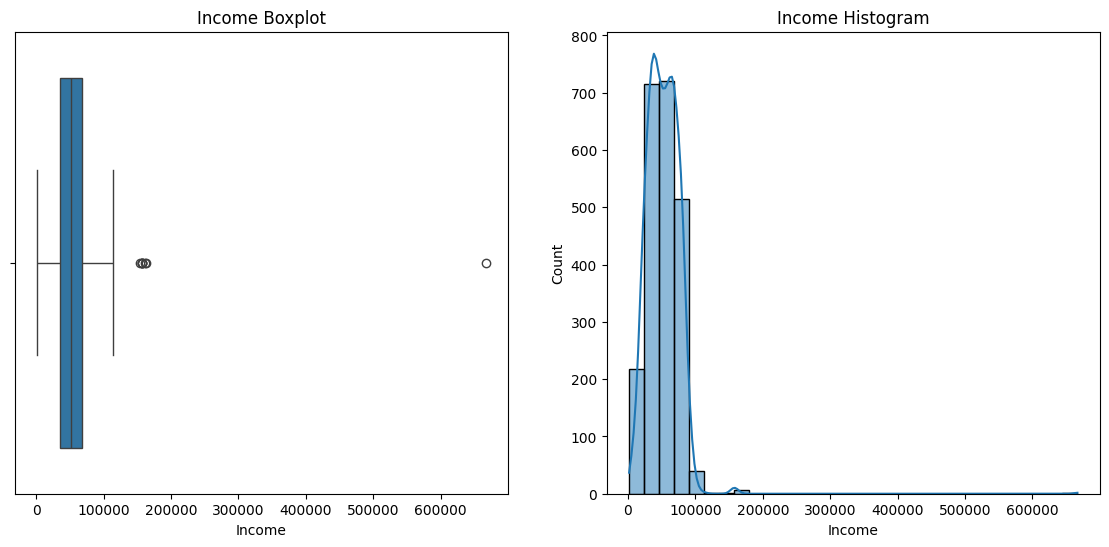

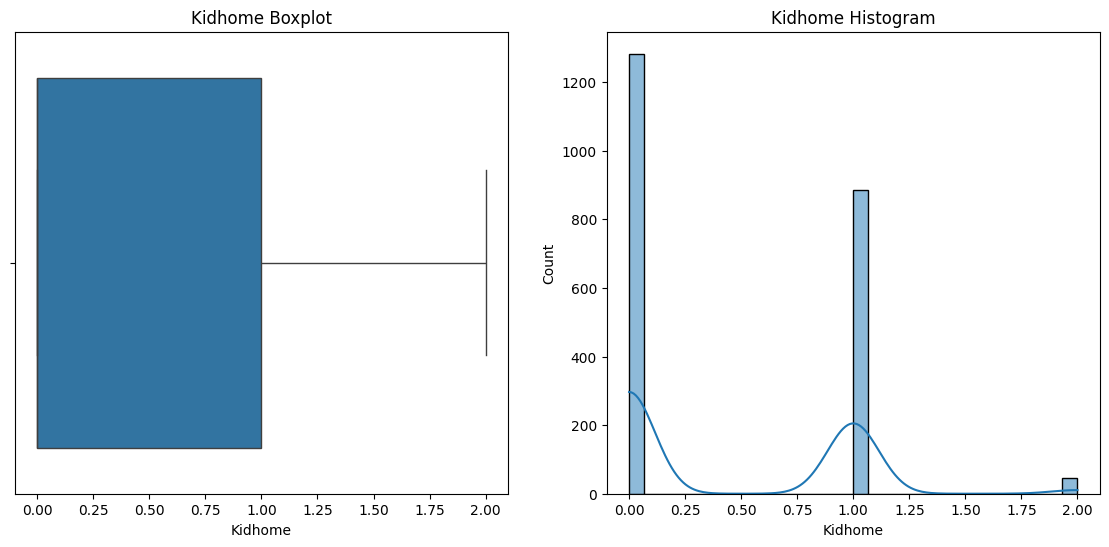

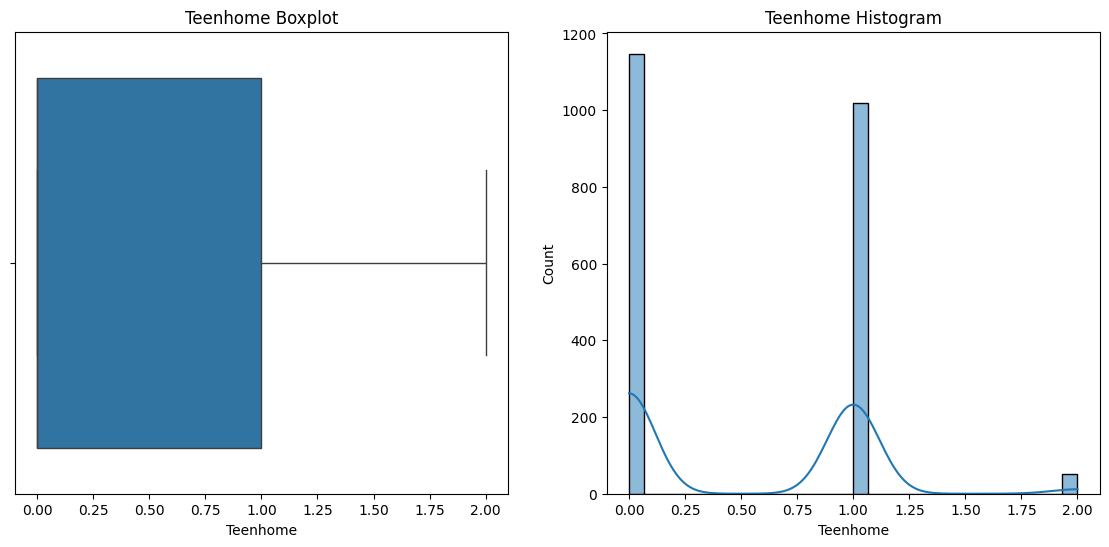

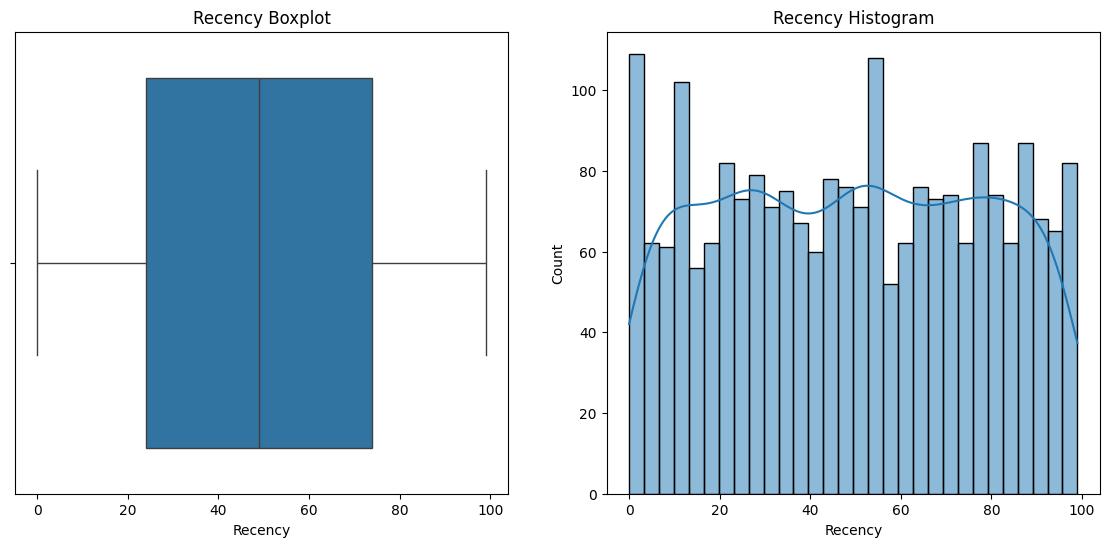

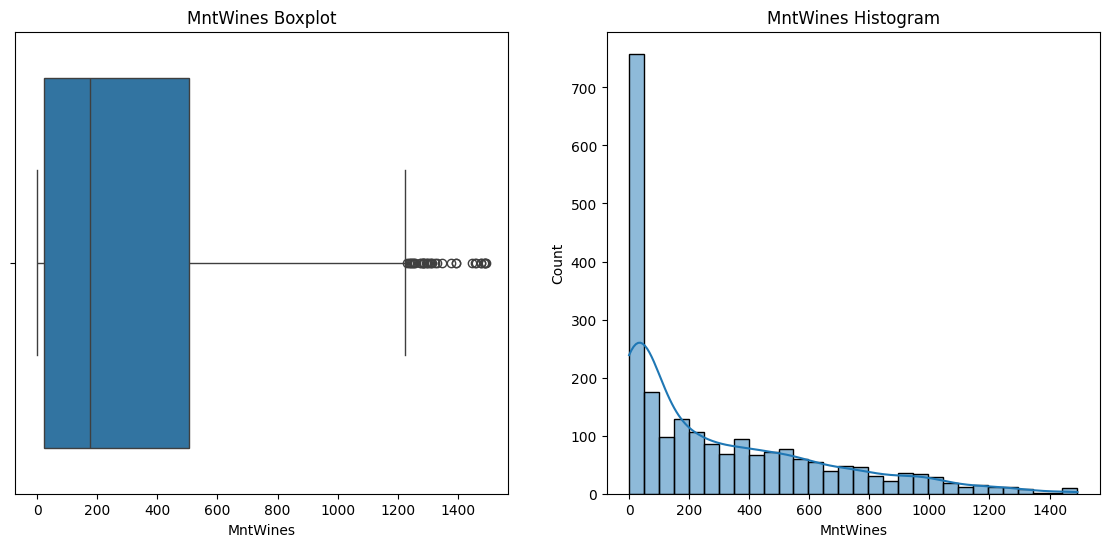

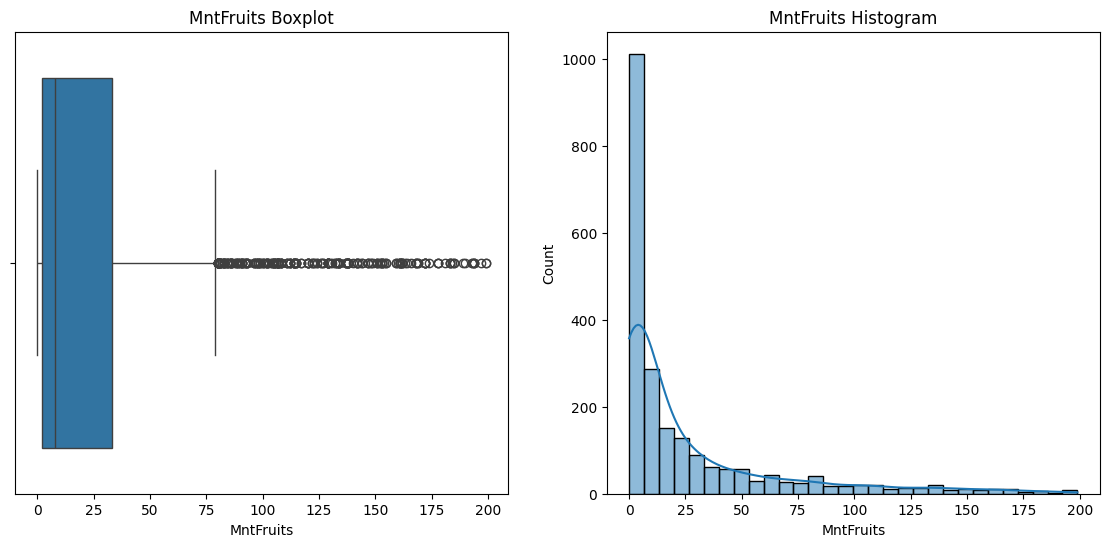

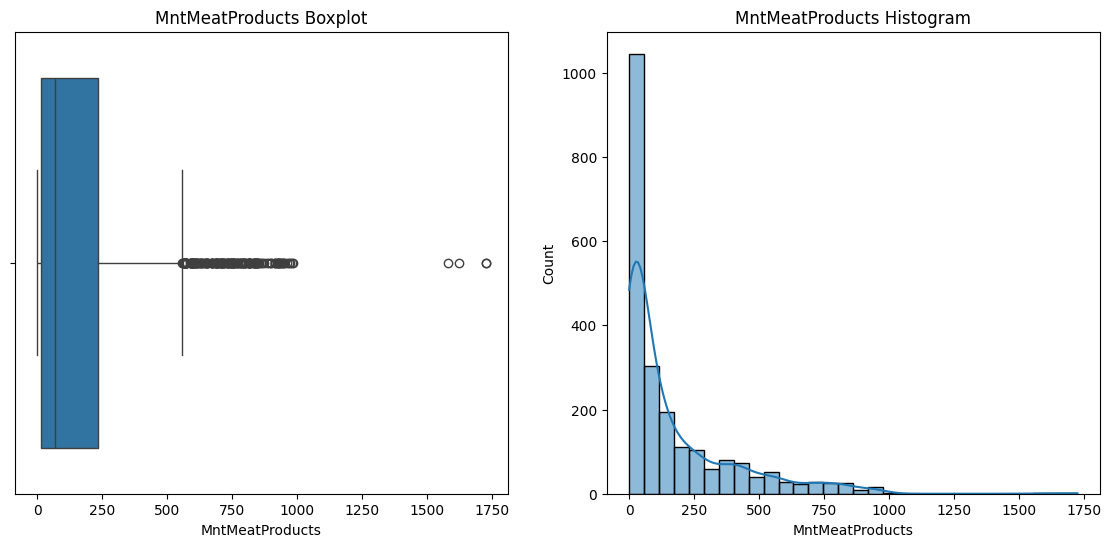

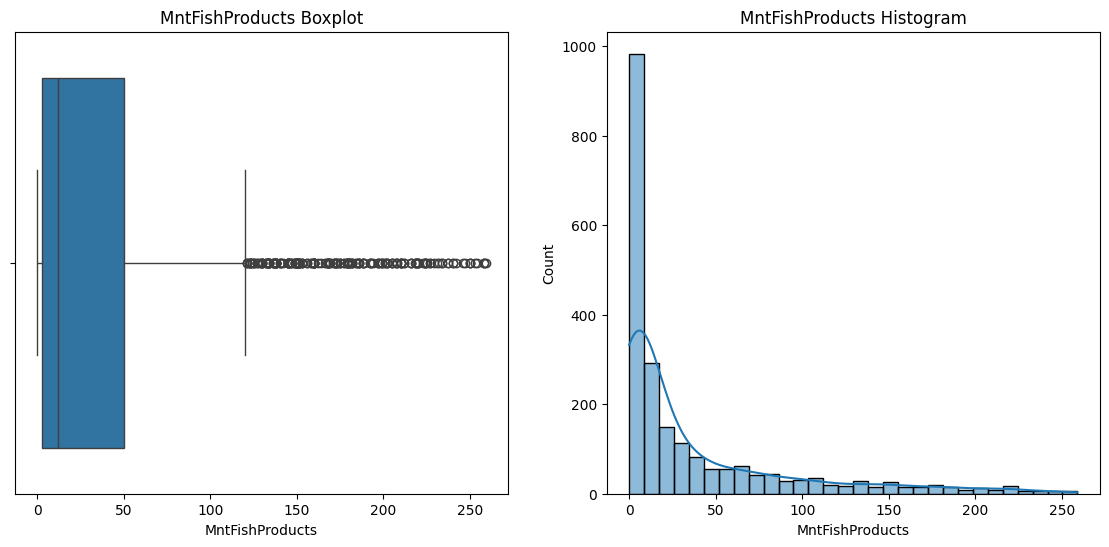

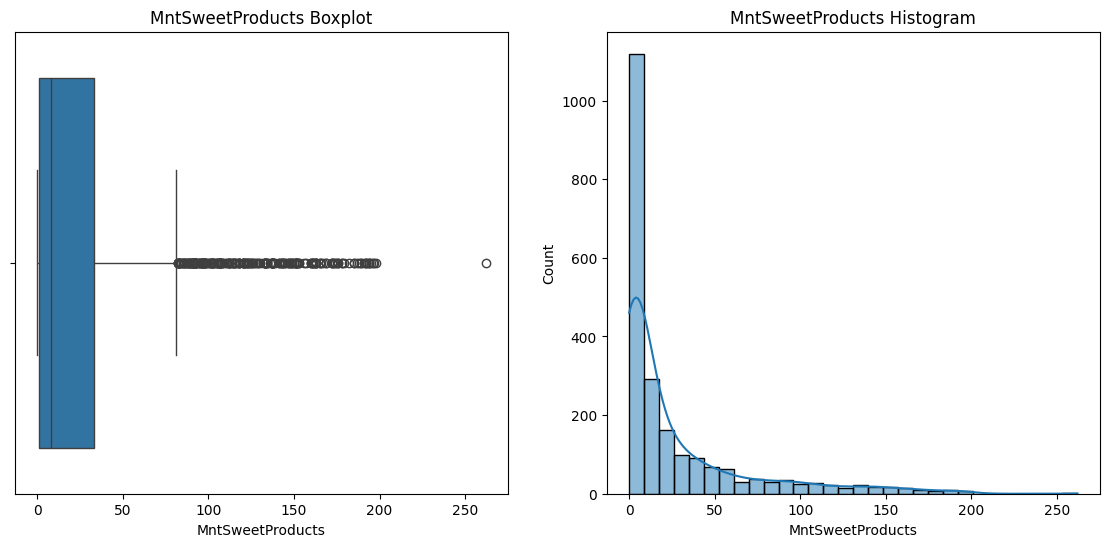

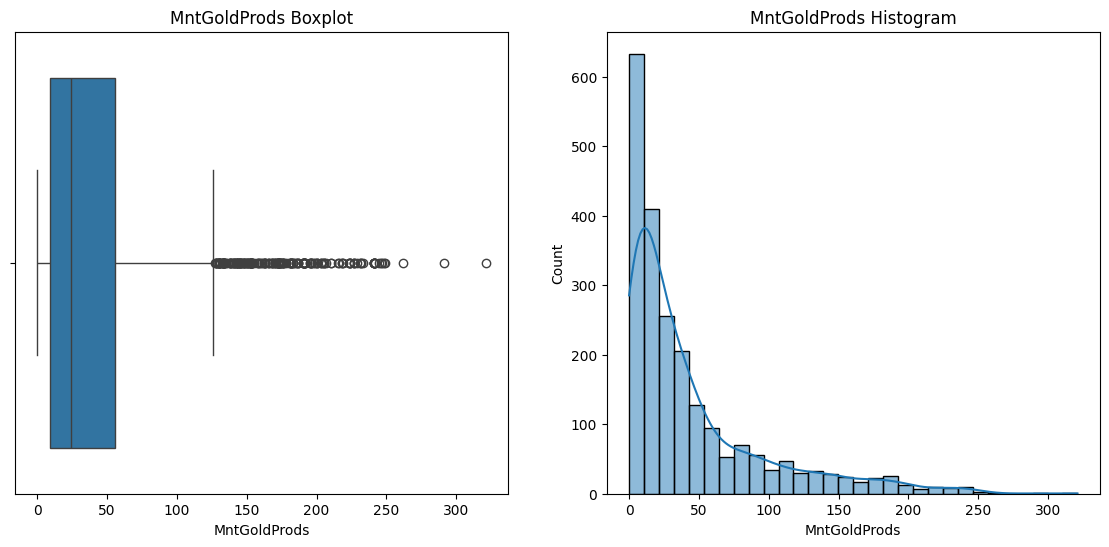

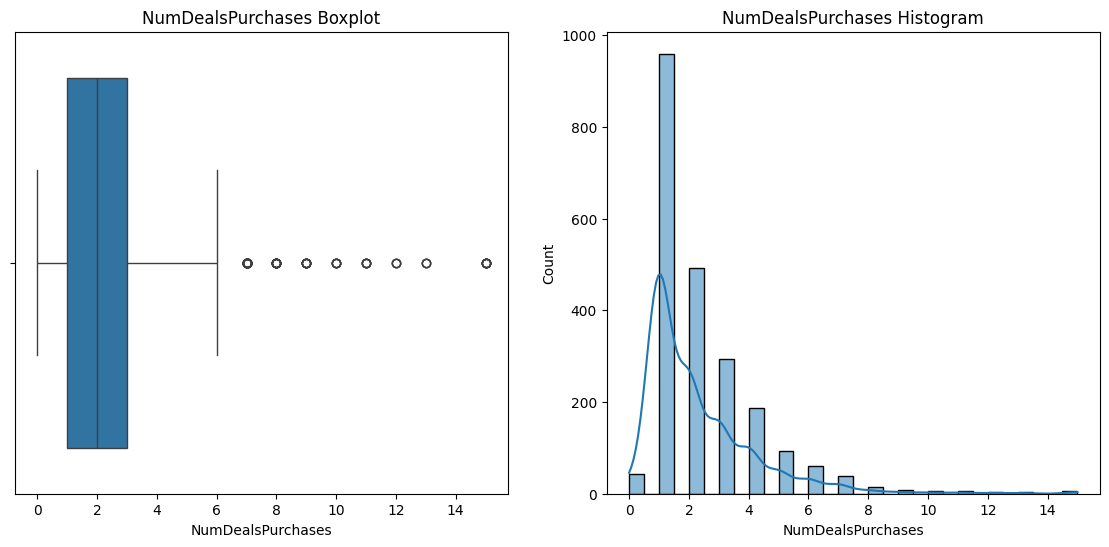

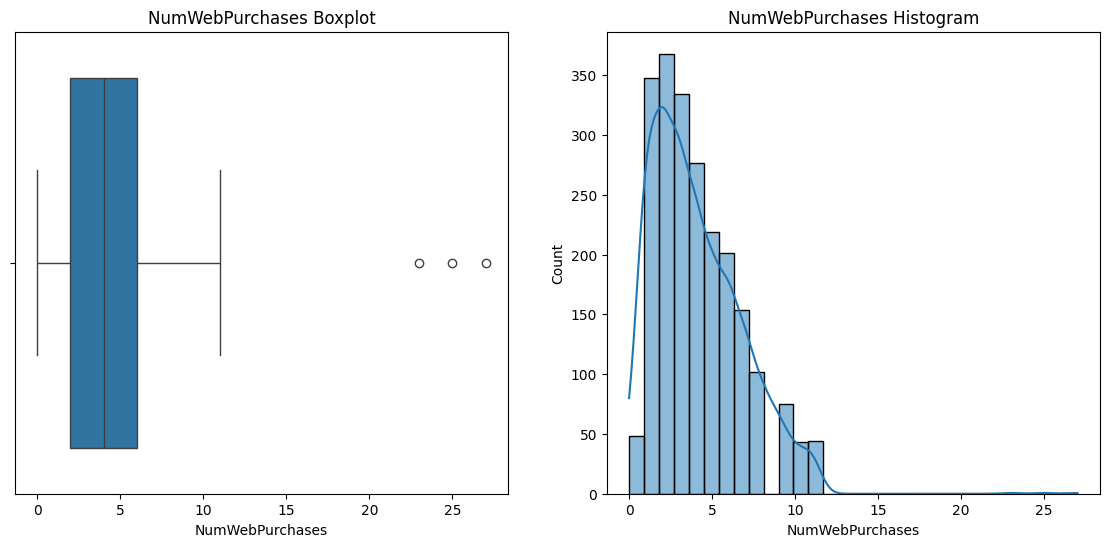

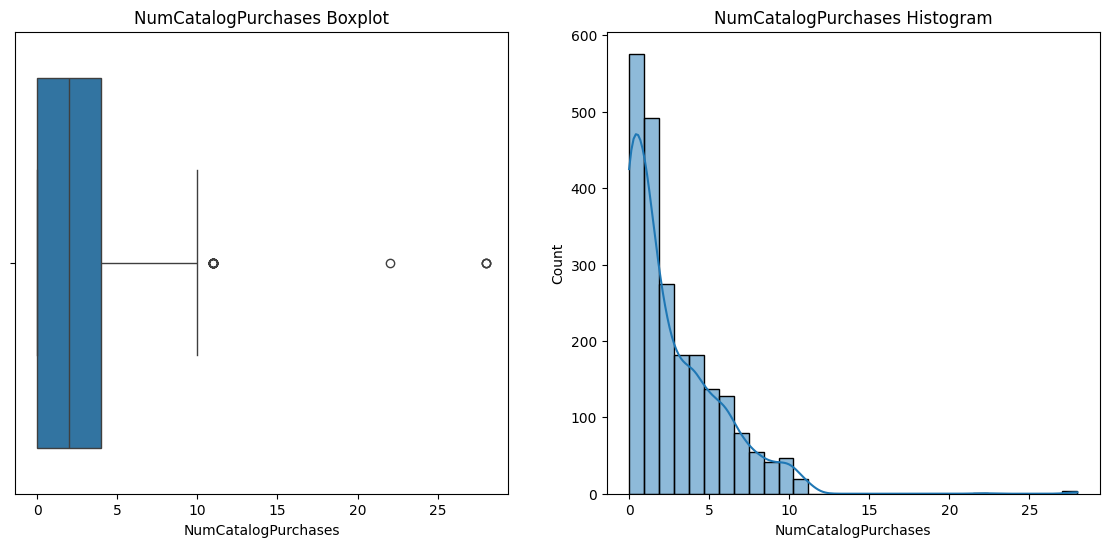

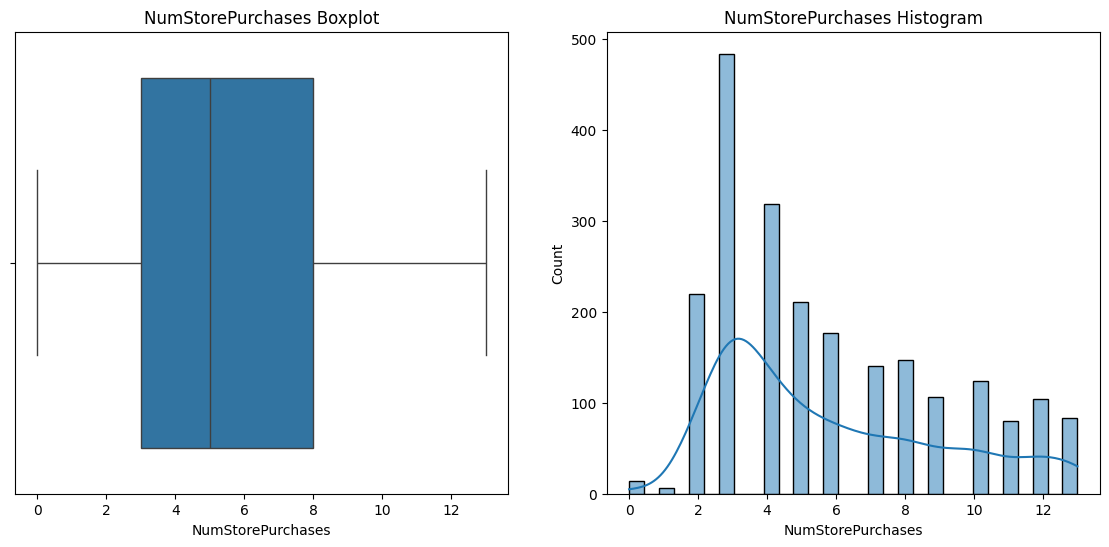

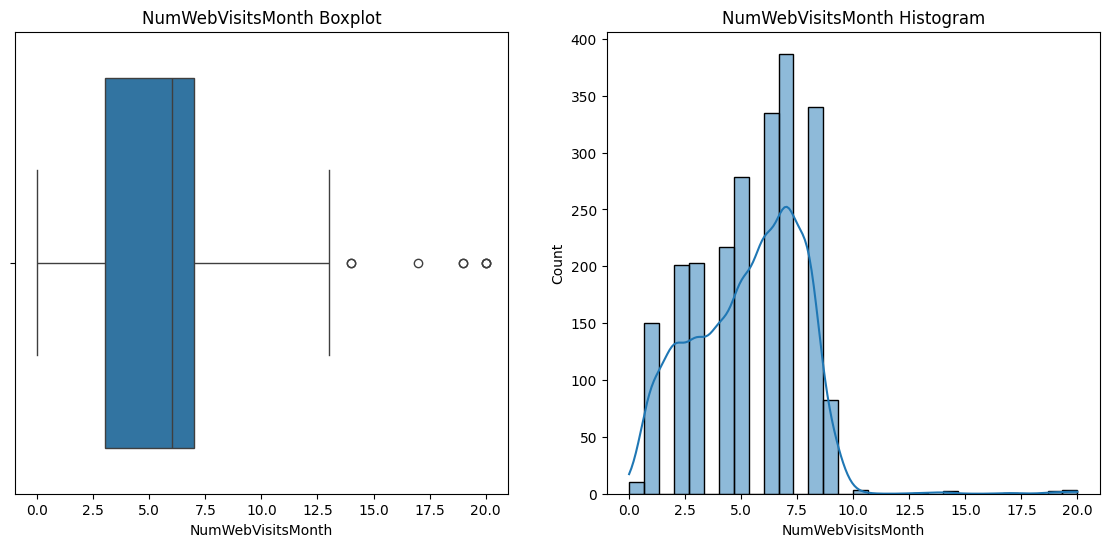

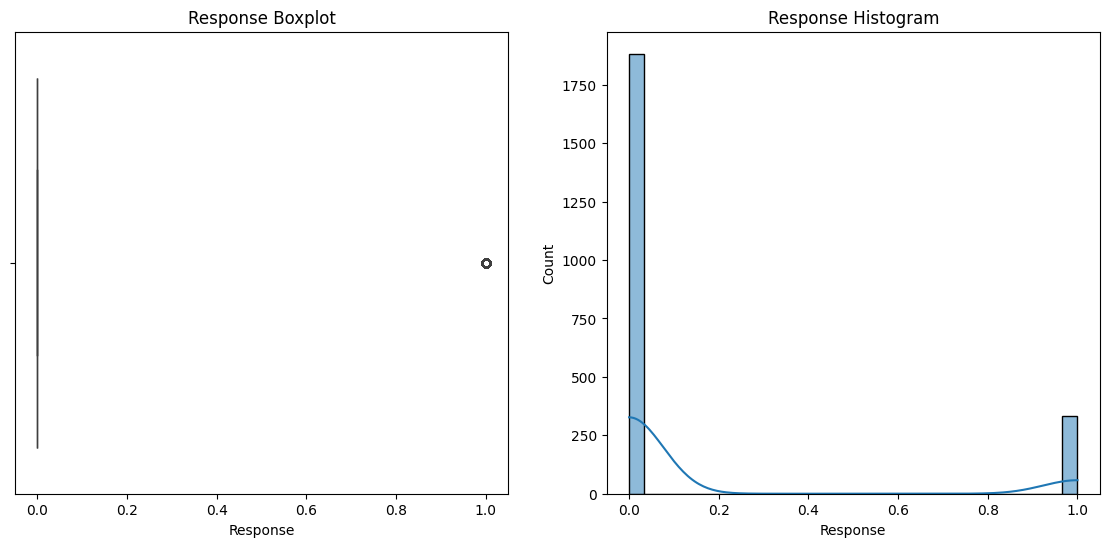

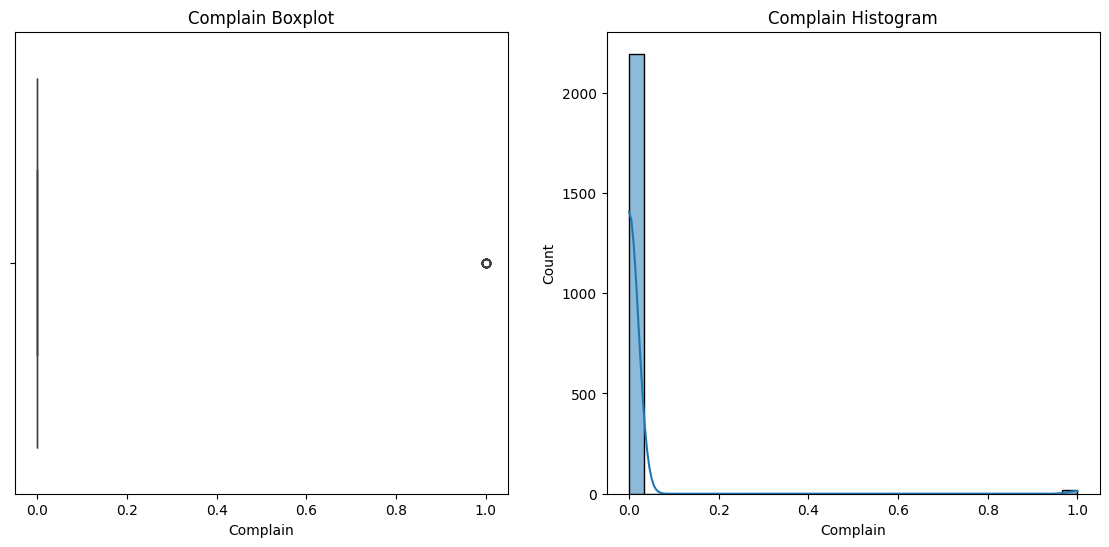

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Visualization of original data
for var in numerical_cols:
    if var in df.columns:
        plt.figure(figsize=(14, 6))

        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[var])
        plt.title(f'{var} Boxplot')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df[var], bins=30, kde=True)
        plt.title(f'{var} Histogram')

        plt.show()


##Identify Outliers

In [ ]:
# Identify outliers using IQR method
outlier_counts = {}

for var in numerical_cols:
    if var in df.columns:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

        outlier_counts[var] = len(outliers)

        print(f"Number of outliers in {var}: {len(outliers)}")


Number of outliers in Id: 0
Number of outliers in Year_Birth: 3
Number of outliers in Income: 8
Number of outliers in Kidhome: 0
Number of outliers in Teenhome: 0
Number of outliers in Recency: 0
Number of outliers in MntWines: 35
Number of outliers in MntFruits: 246
Number of outliers in MntMeatProducts: 174
Number of outliers in MntFishProducts: 222
Number of outliers in MntSweetProducts: 246
Number of outliers in MntGoldProds: 205
Number of outliers in NumDealsPurchases: 84
Number of outliers in NumWebPurchases: 3
Number of outliers in NumCatalogPurchases: 23
Number of outliers in NumStorePurchases: 0
Number of outliers in NumWebVisitsMonth: 8
Number of outliers in Response: 333
Number of outliers in Complain: 21


##Visualization Without Outliers

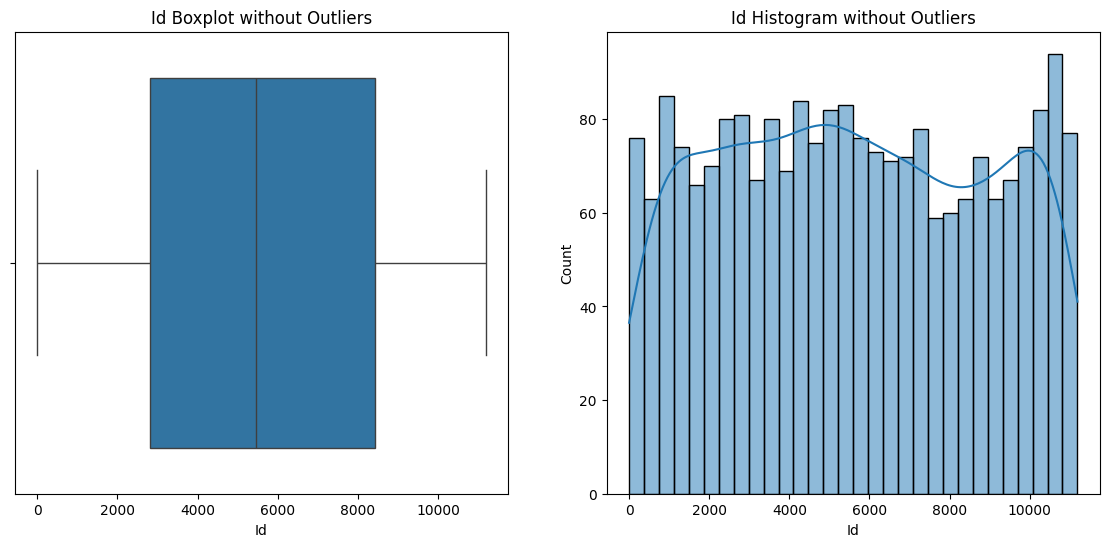

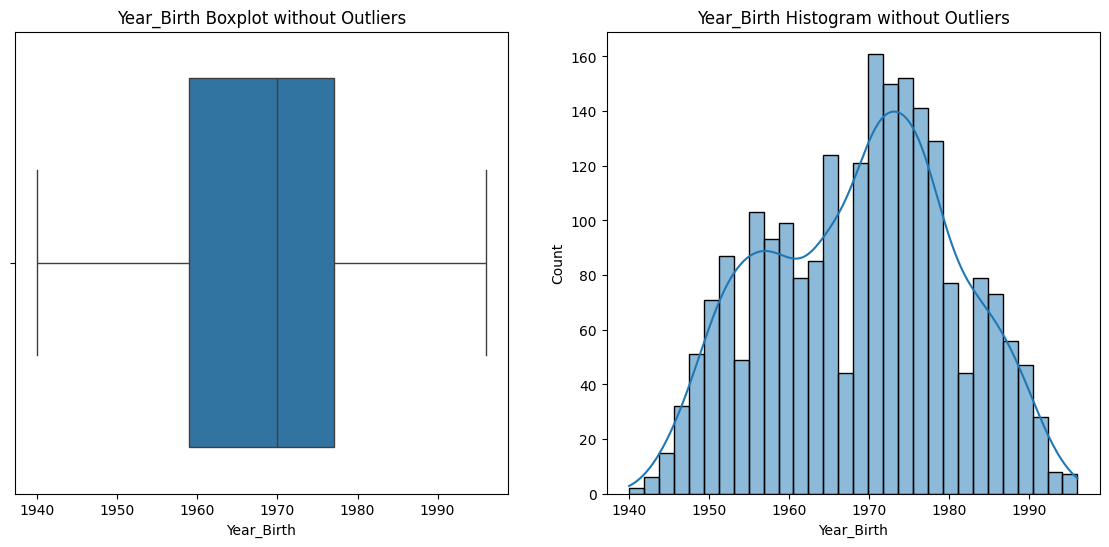

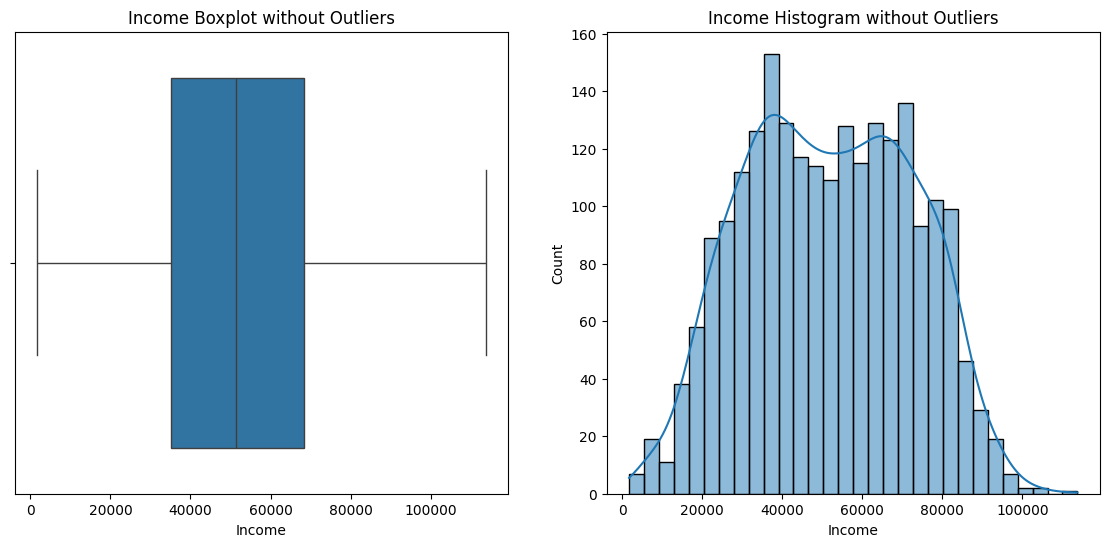

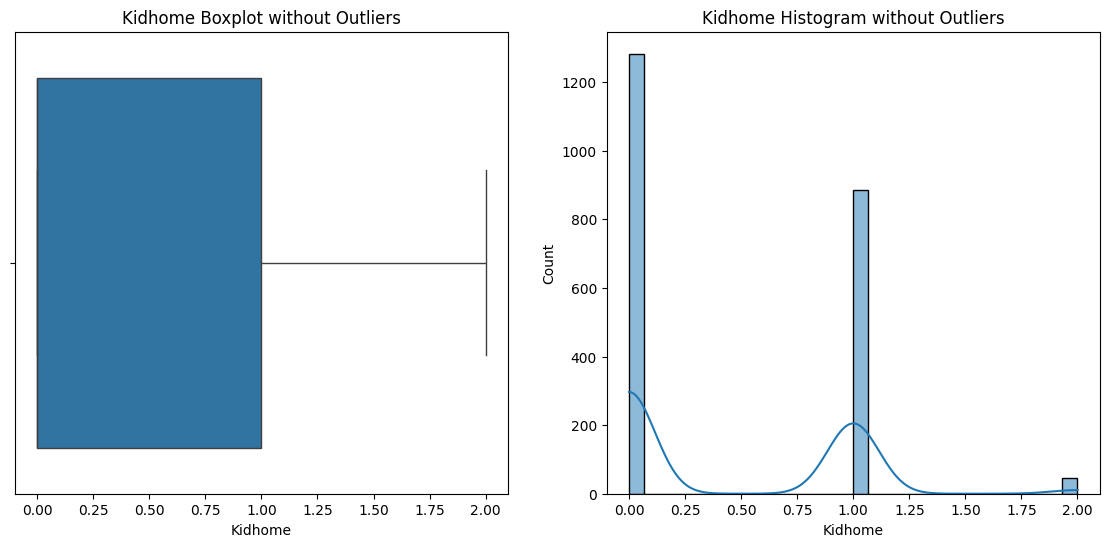

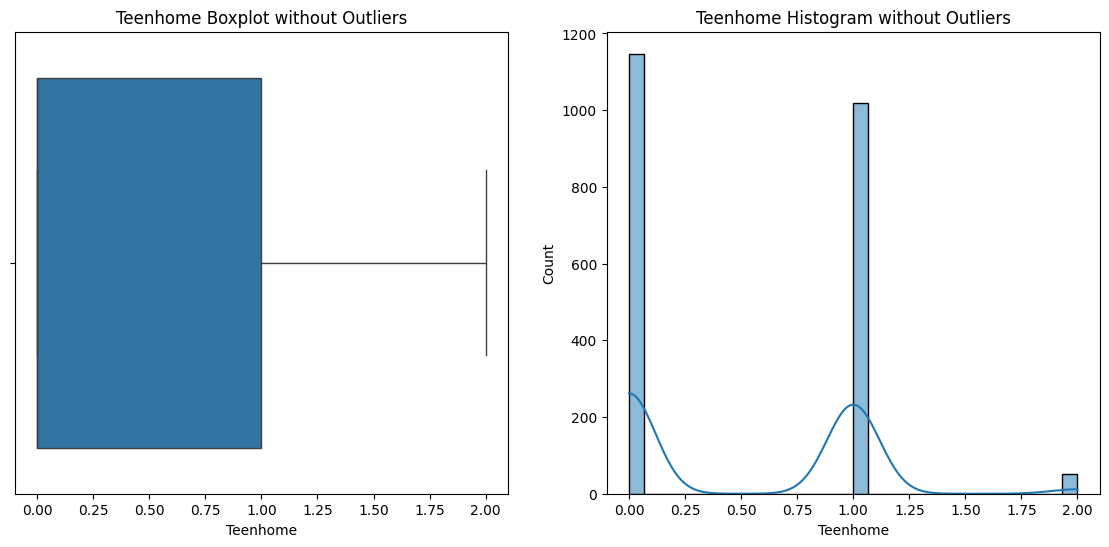

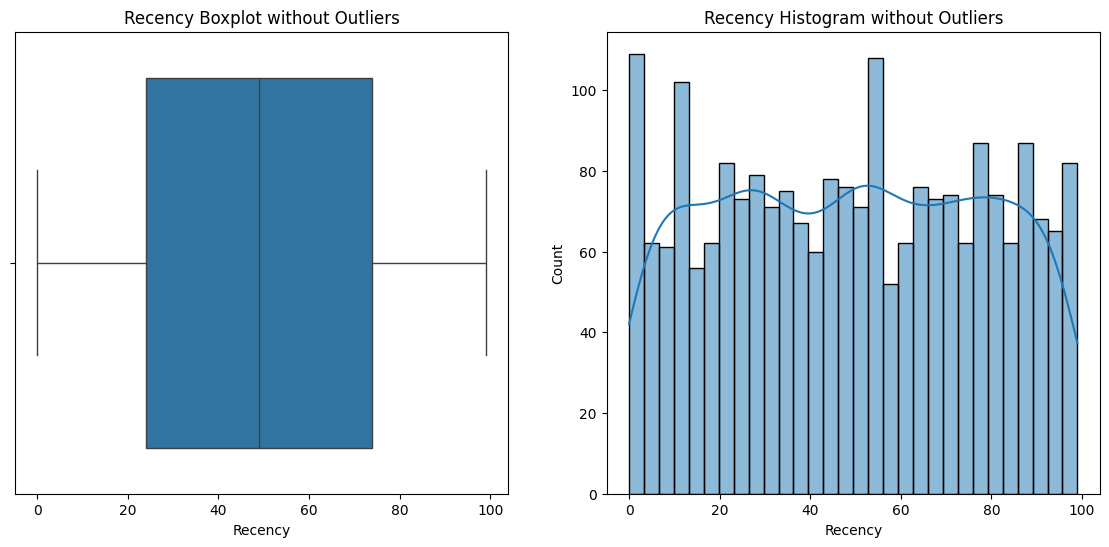

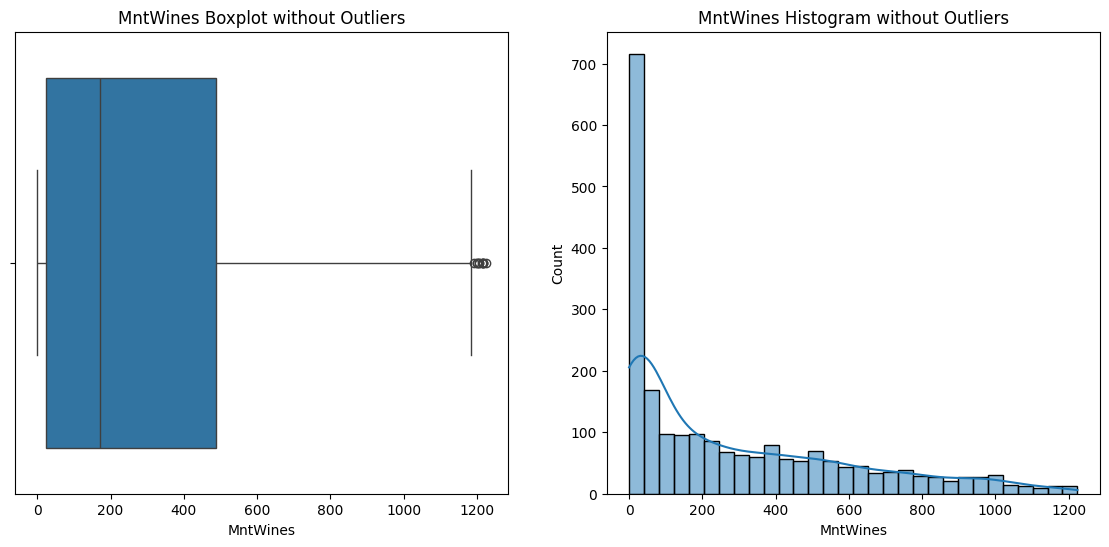

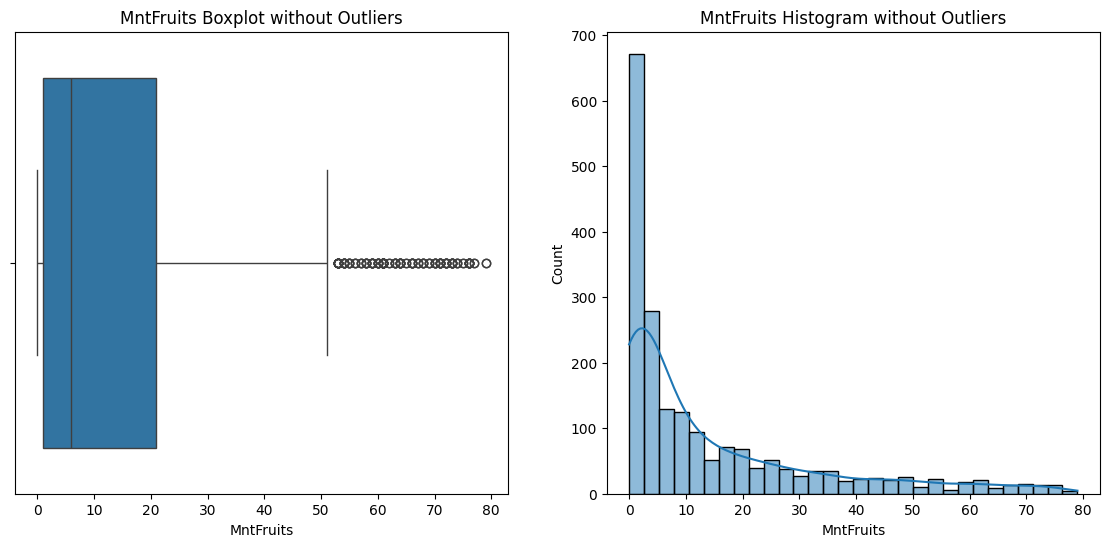

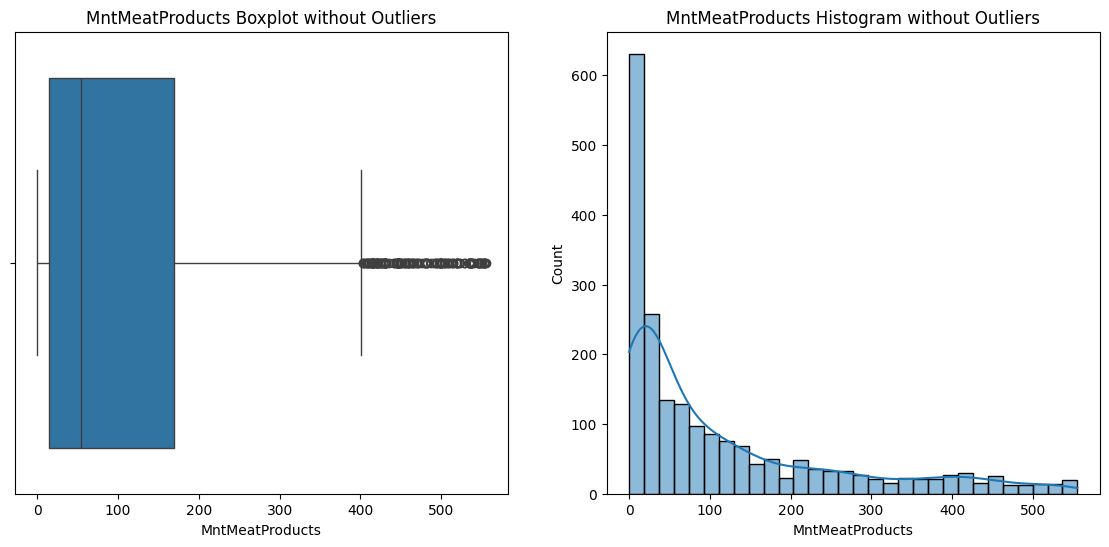

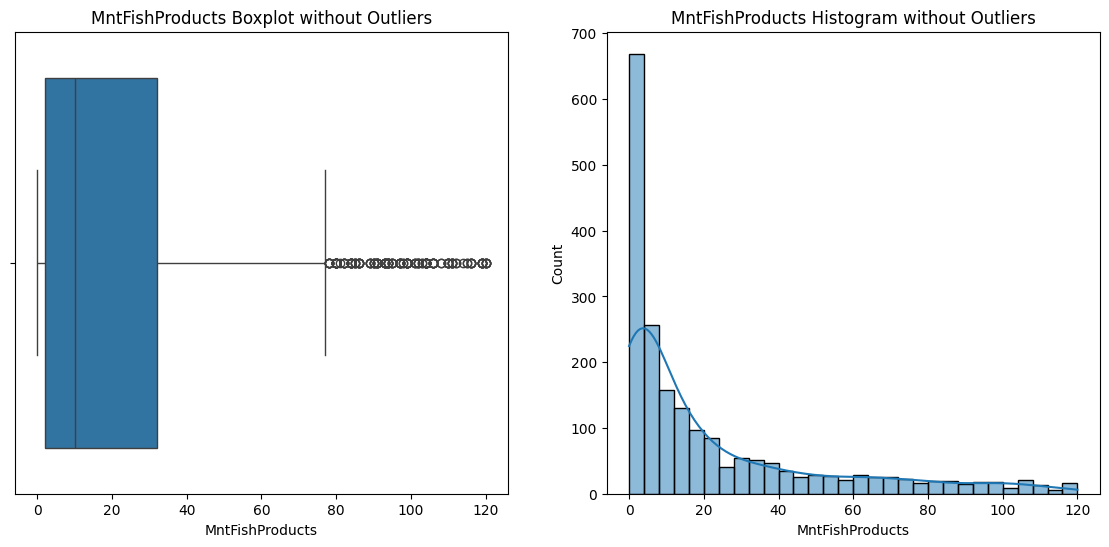

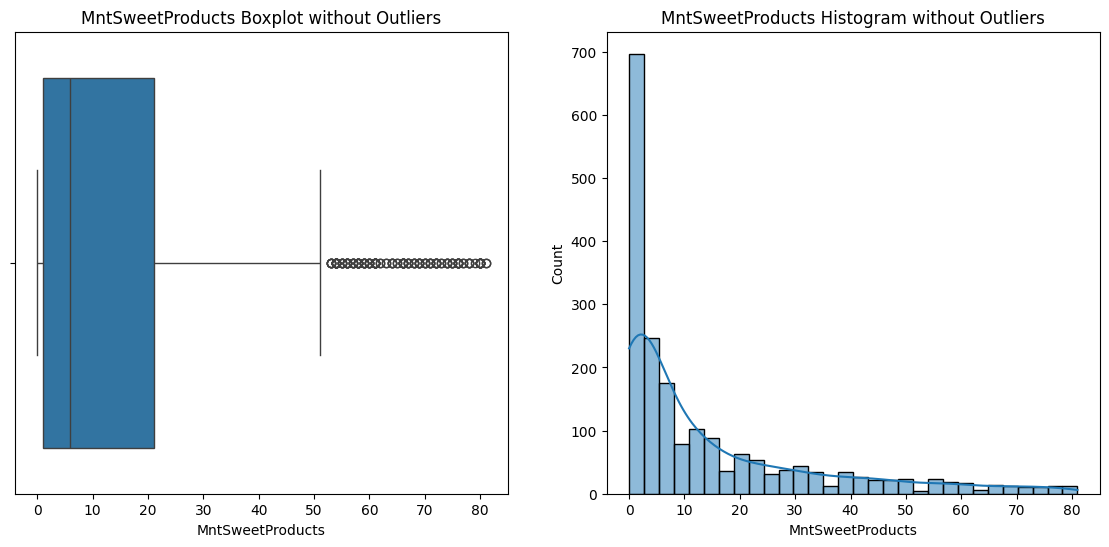

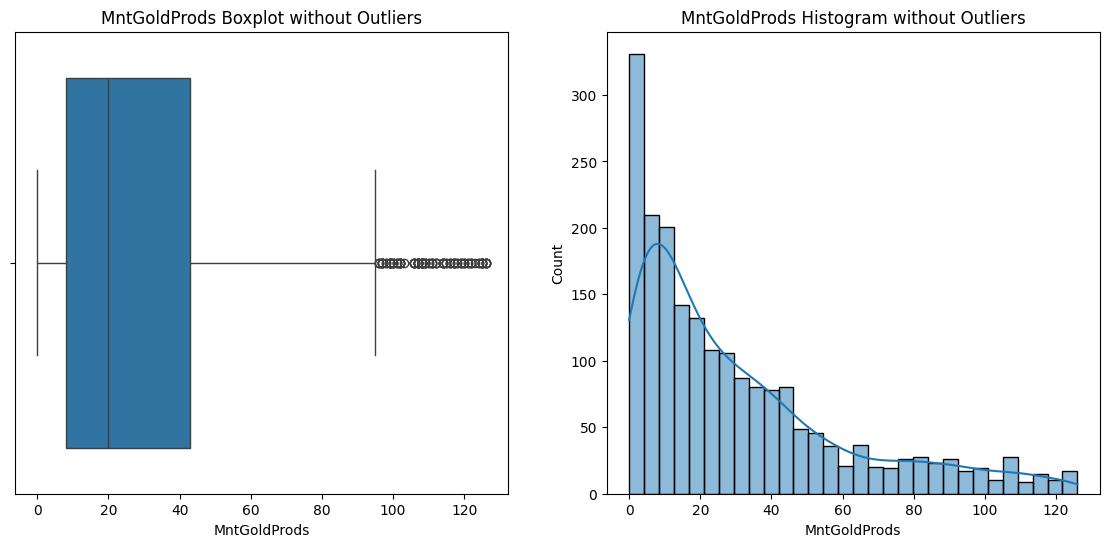

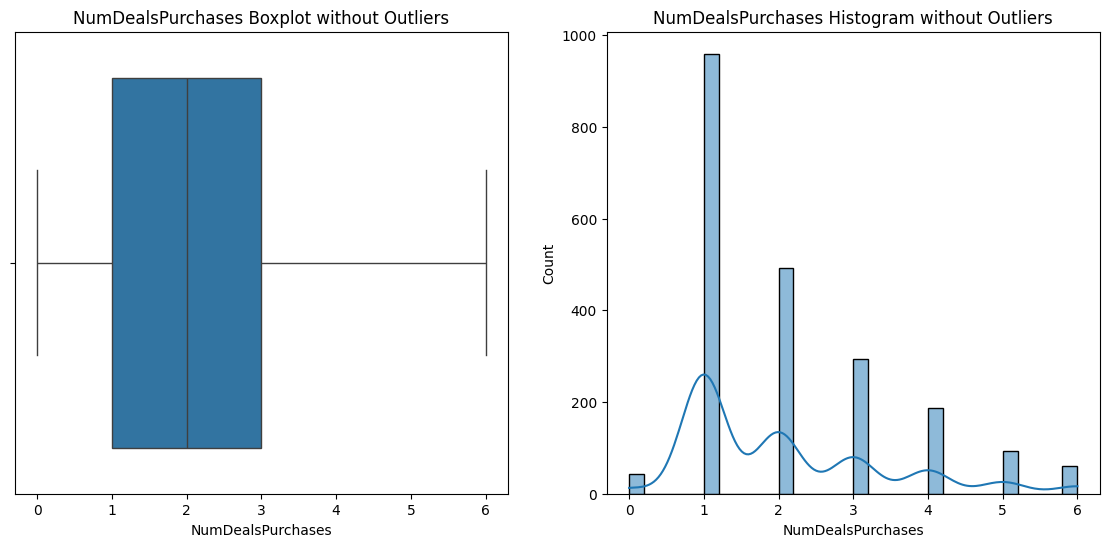

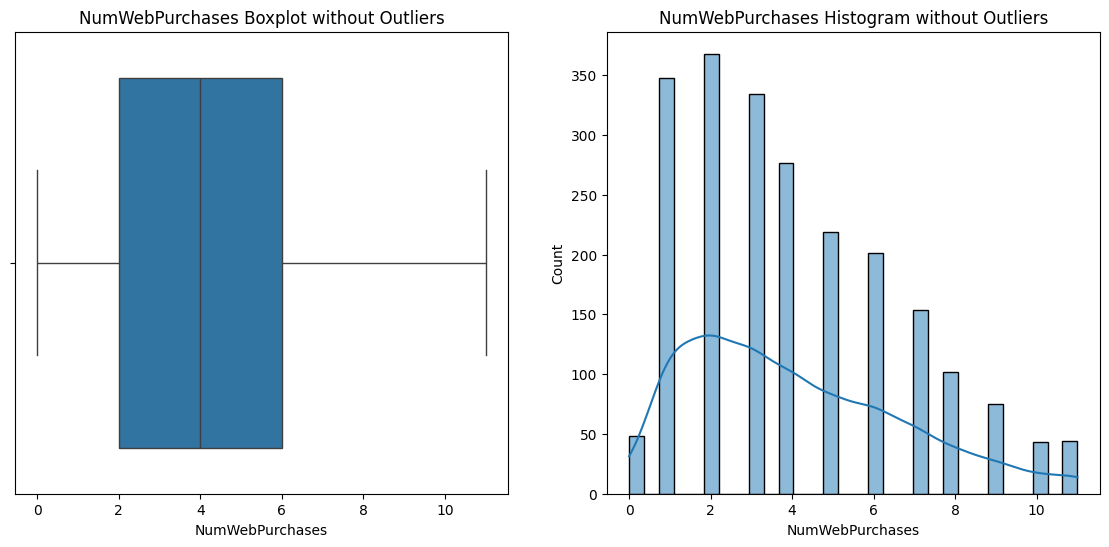

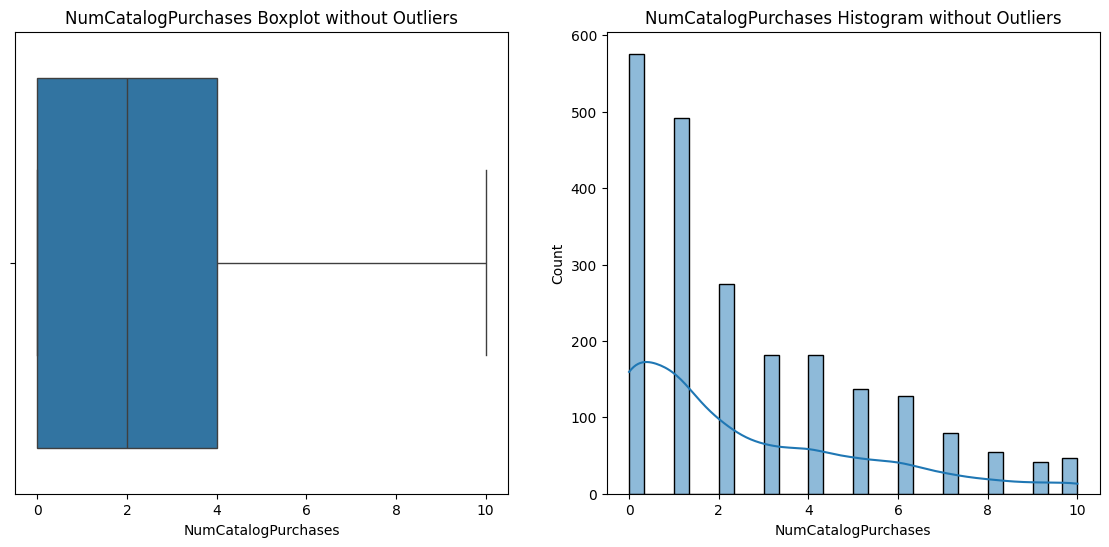

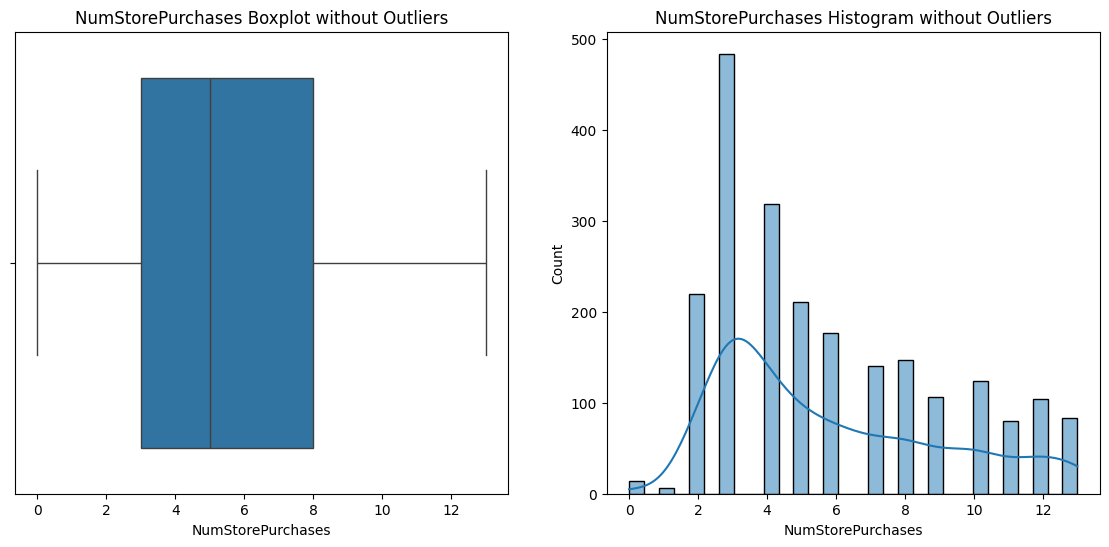

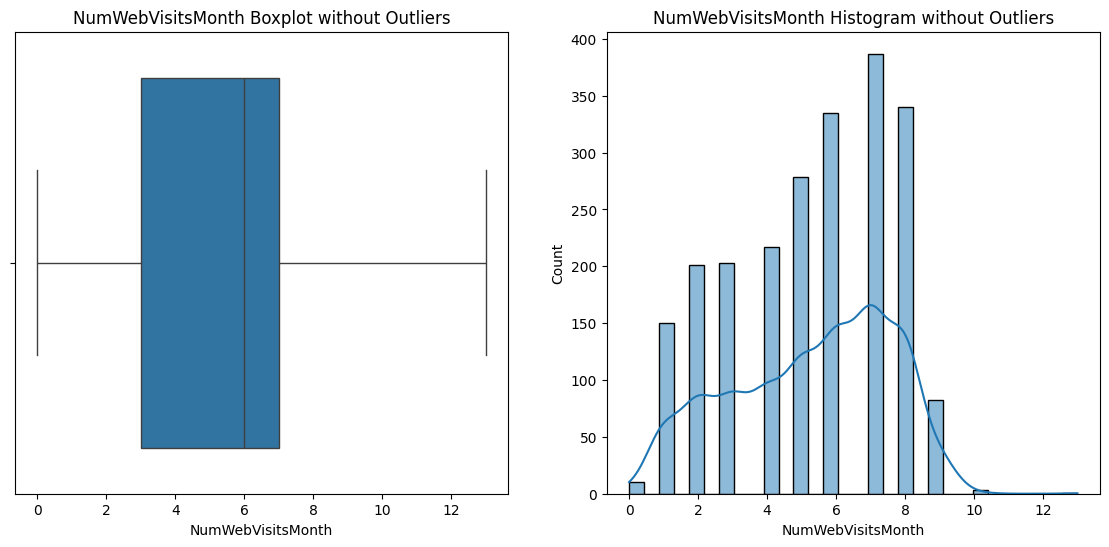

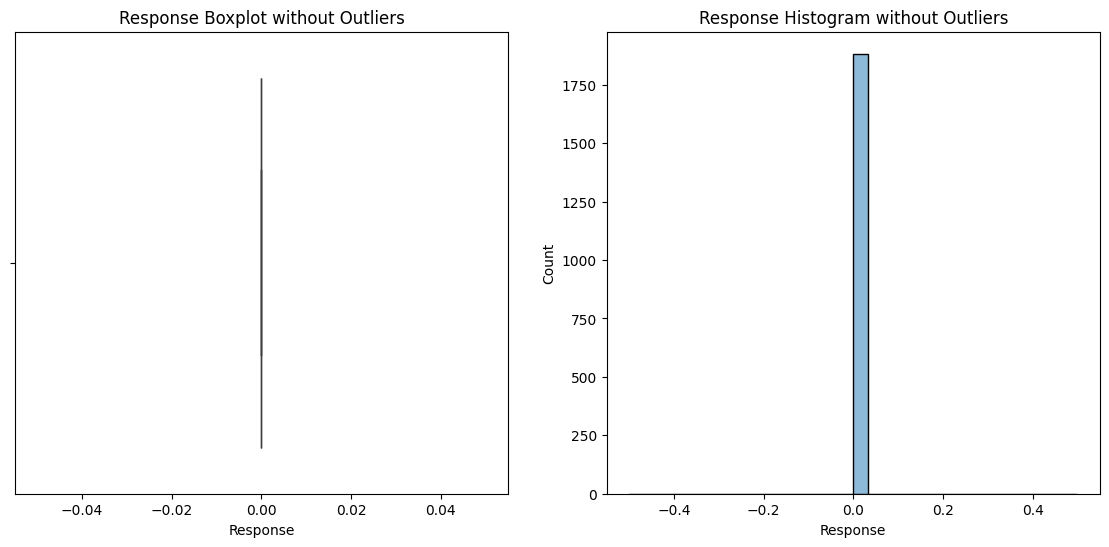

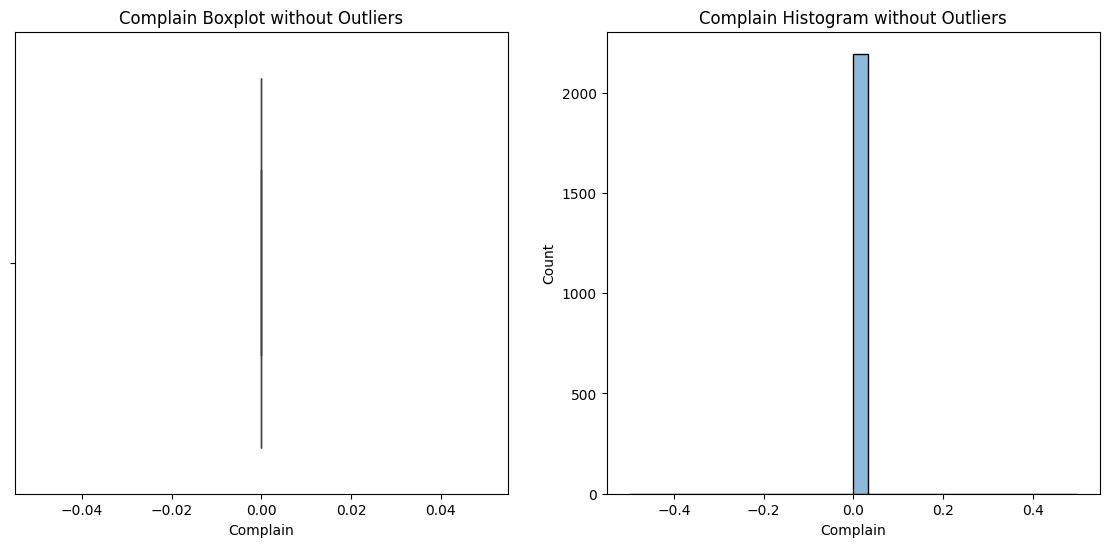

In [ ]:
# Visualization without outliers
for var in numerical_cols:
    if var in df.columns:
        # Identify outliers using IQR method
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_no_outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

        # Visualization without outliers
        plt.figure(figsize=(14, 6))

        # Boxplot without outliers
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_no_outliers[var])
        plt.title(f'{var} Boxplot without Outliers')

        # Histogram without outliers
        plt.subplot(1, 2, 2)
        sns.histplot(df_no_outliers[var], bins=30, kde=True)
        plt.title(f'{var} Histogram without Outliers')

        plt.show()


## assigning probability distribution and finding corresponding probability and expected value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


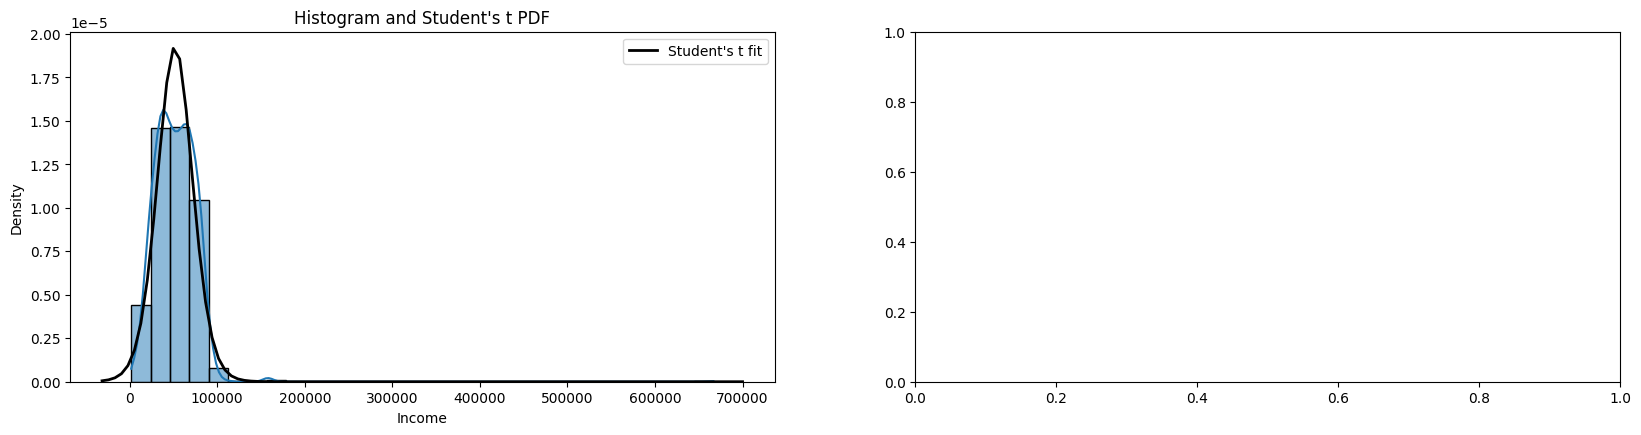

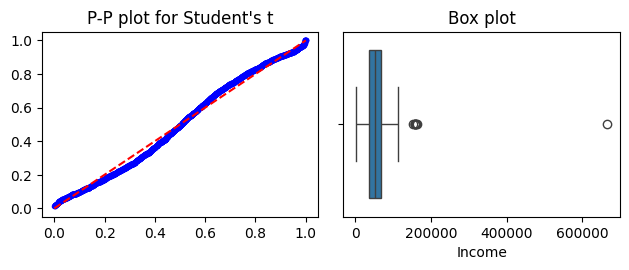

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


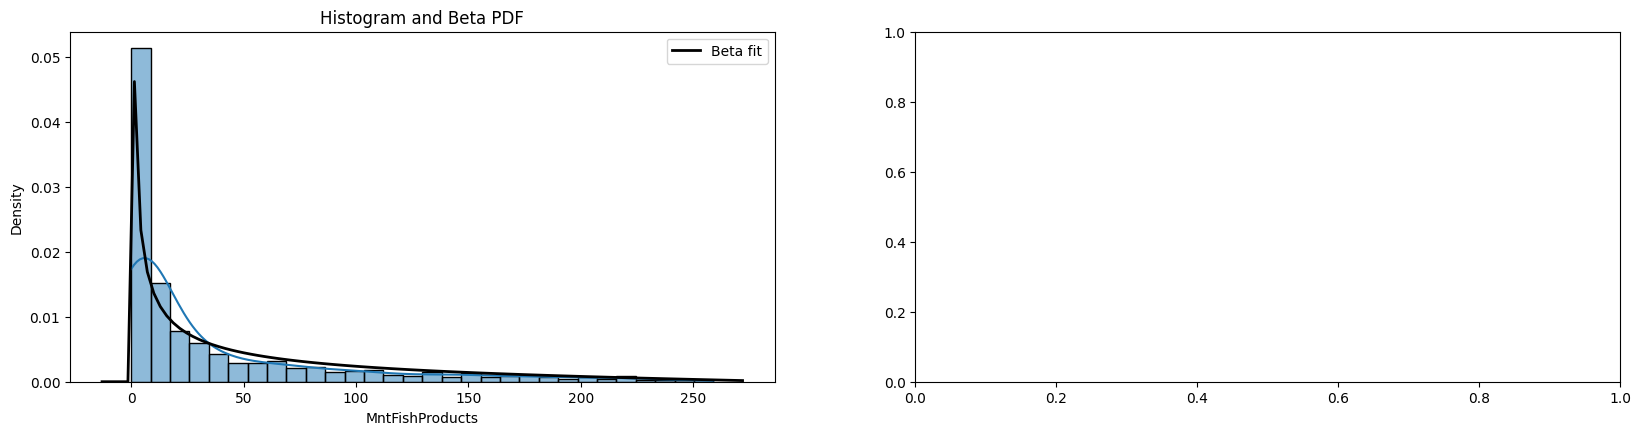

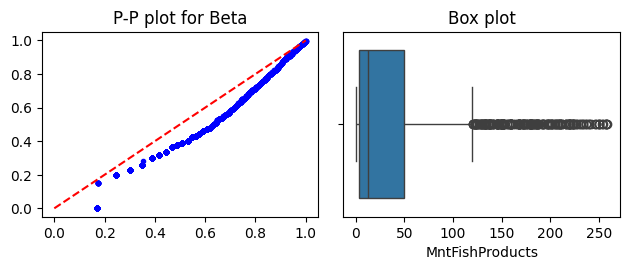

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.r

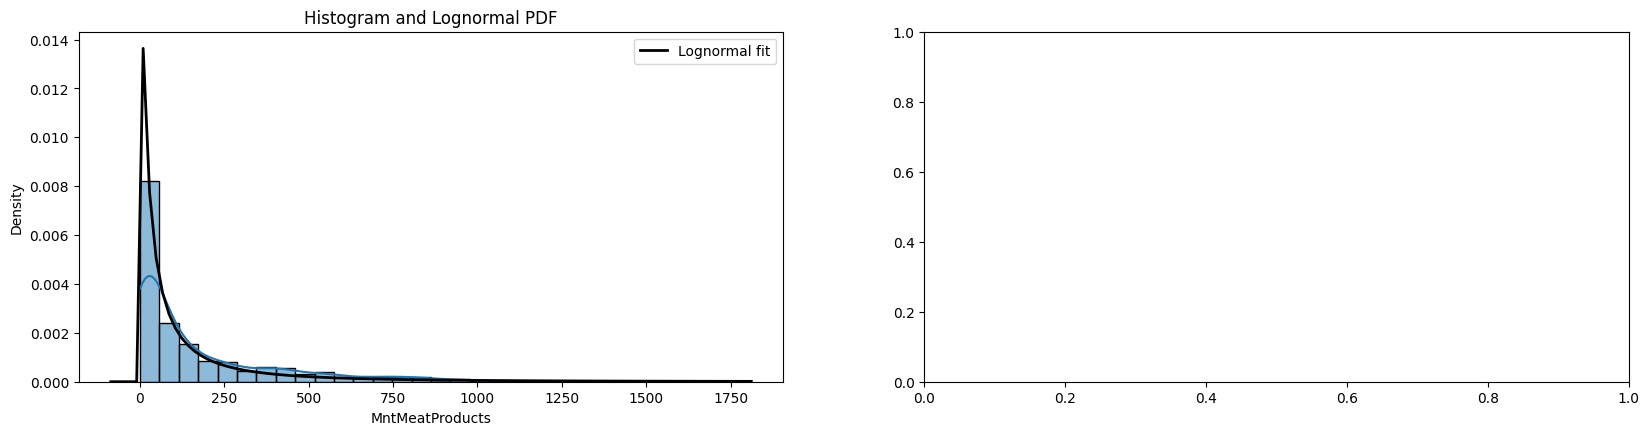

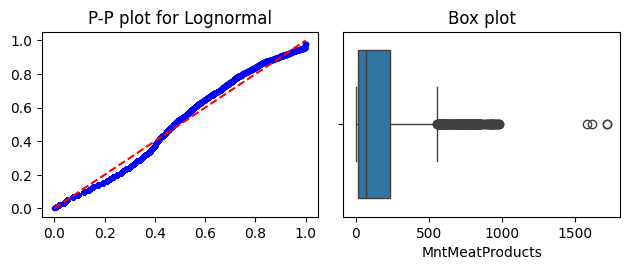

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


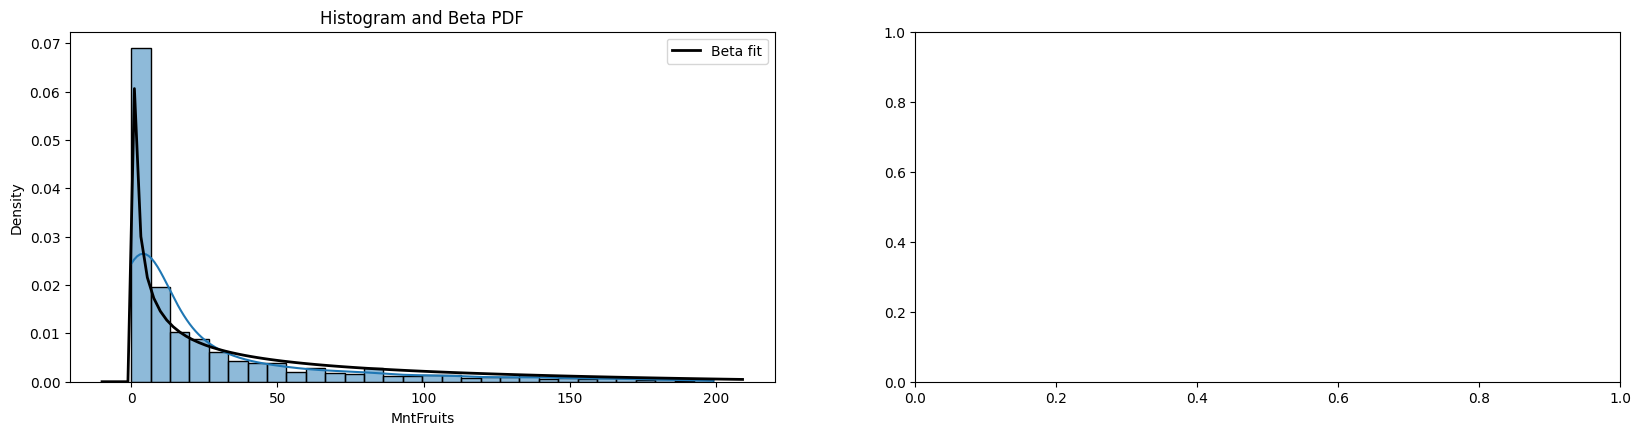

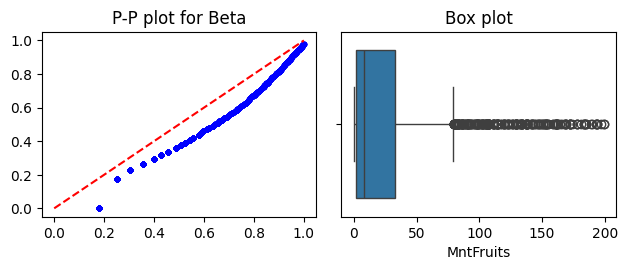

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


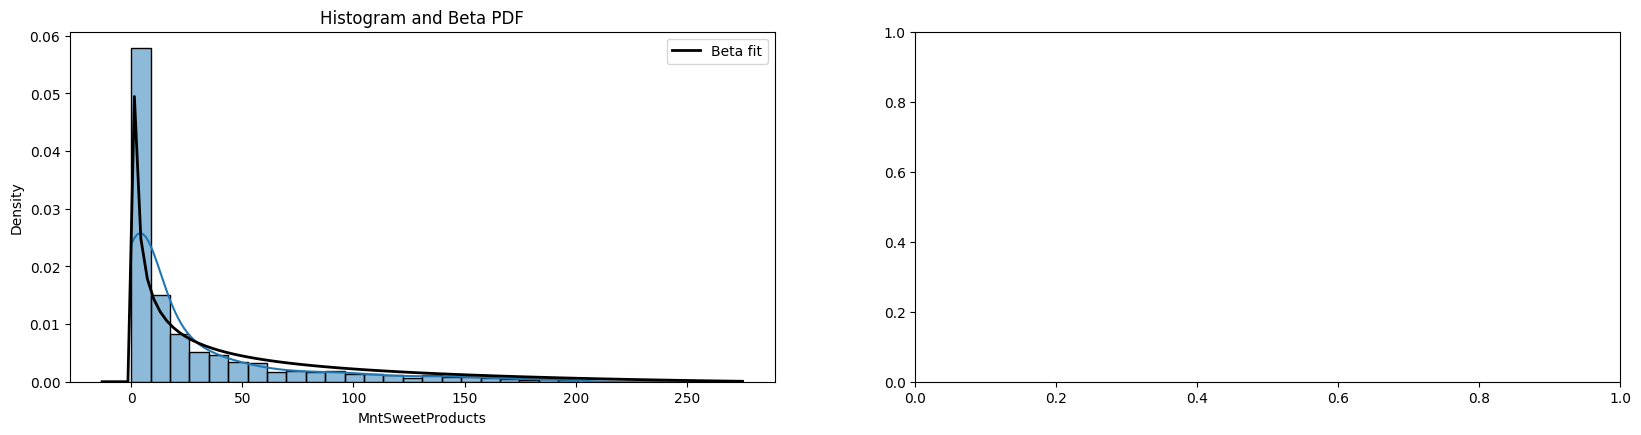

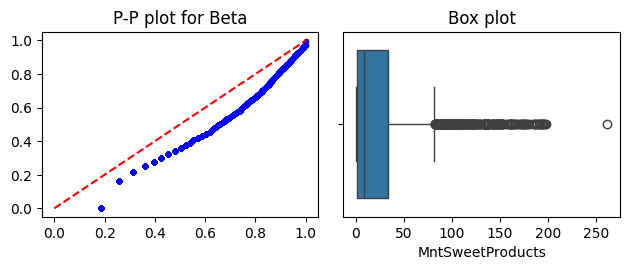

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


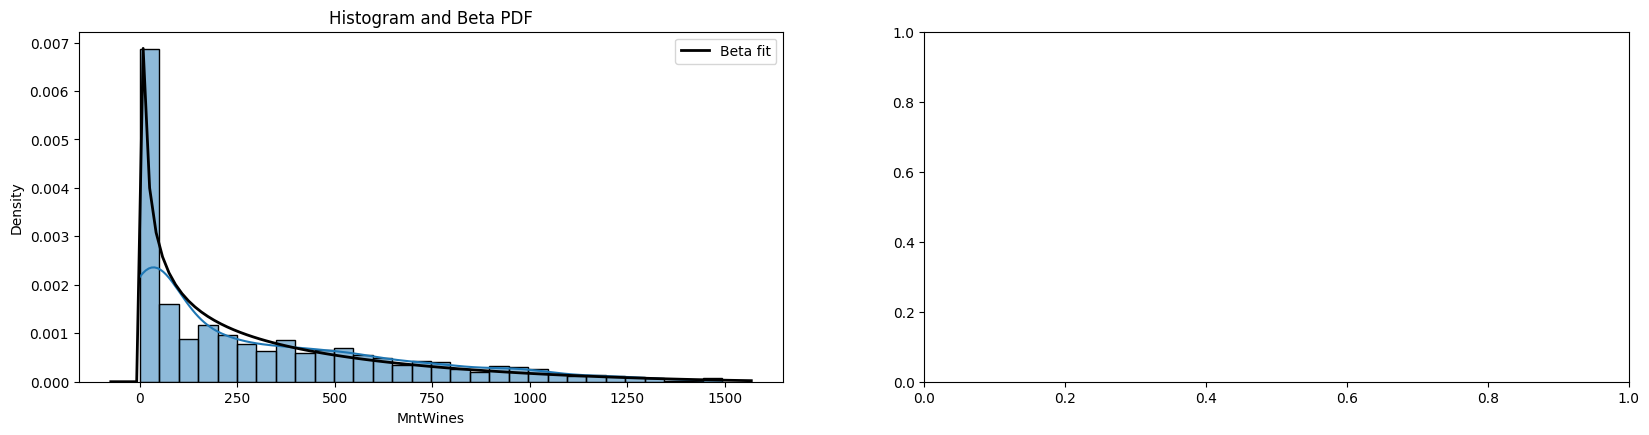

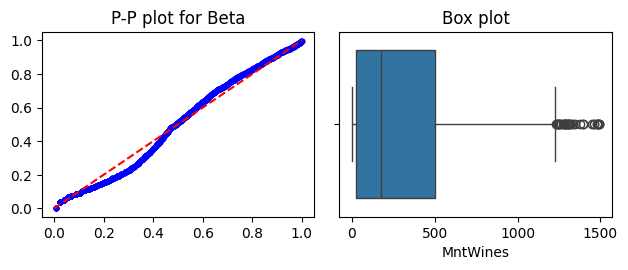

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


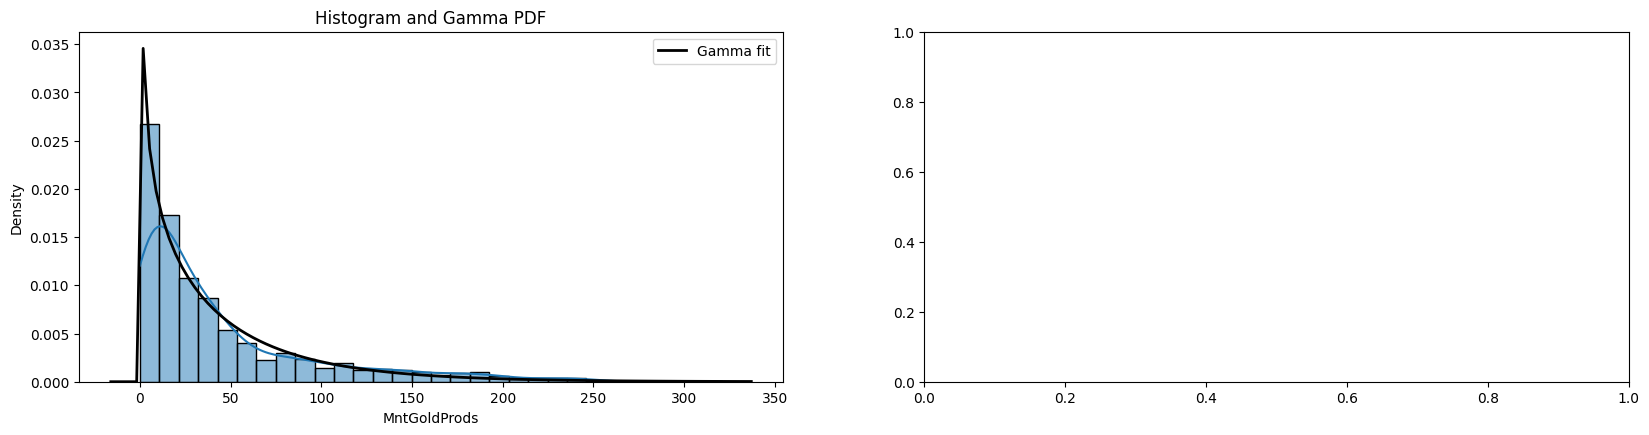

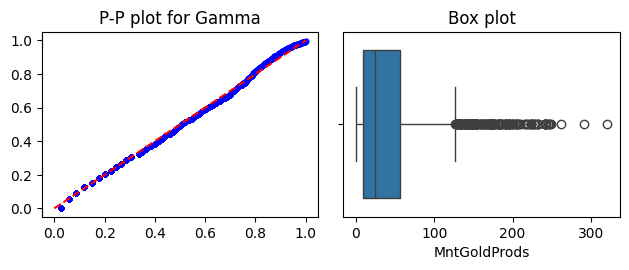

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/p

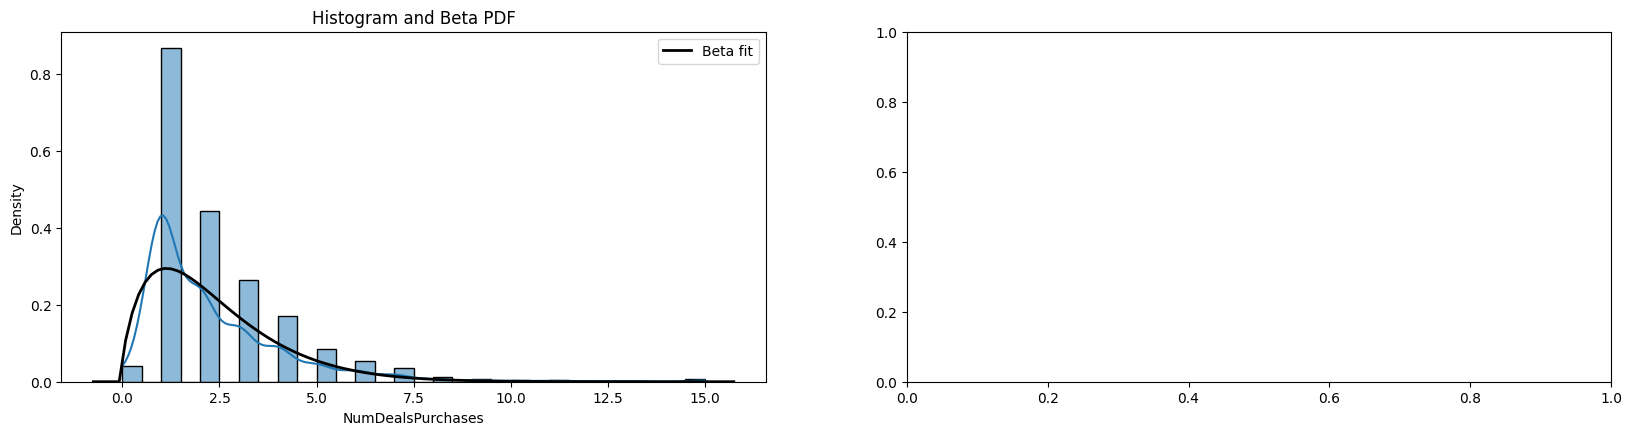

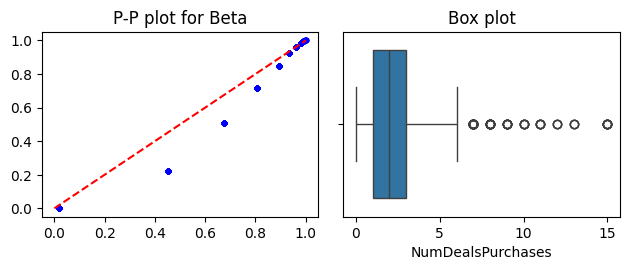

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


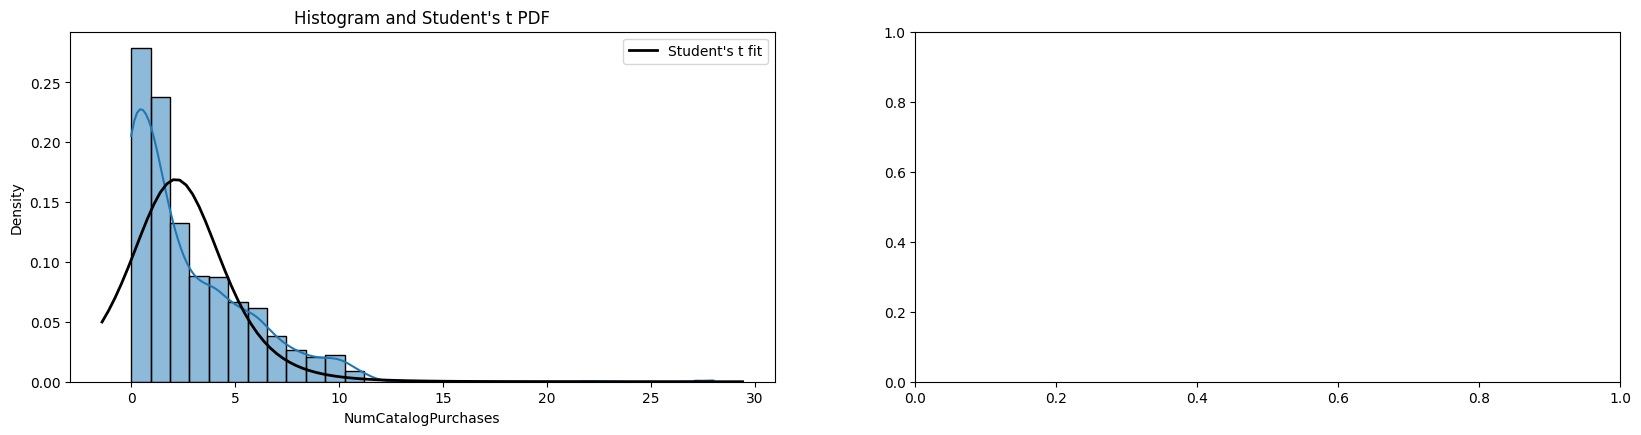

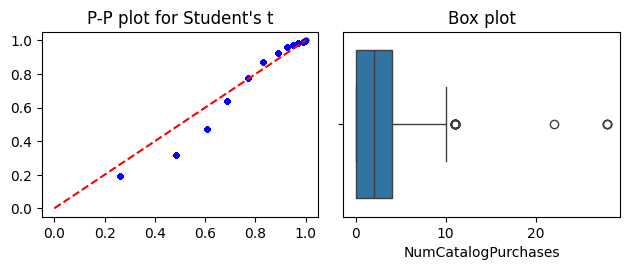

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


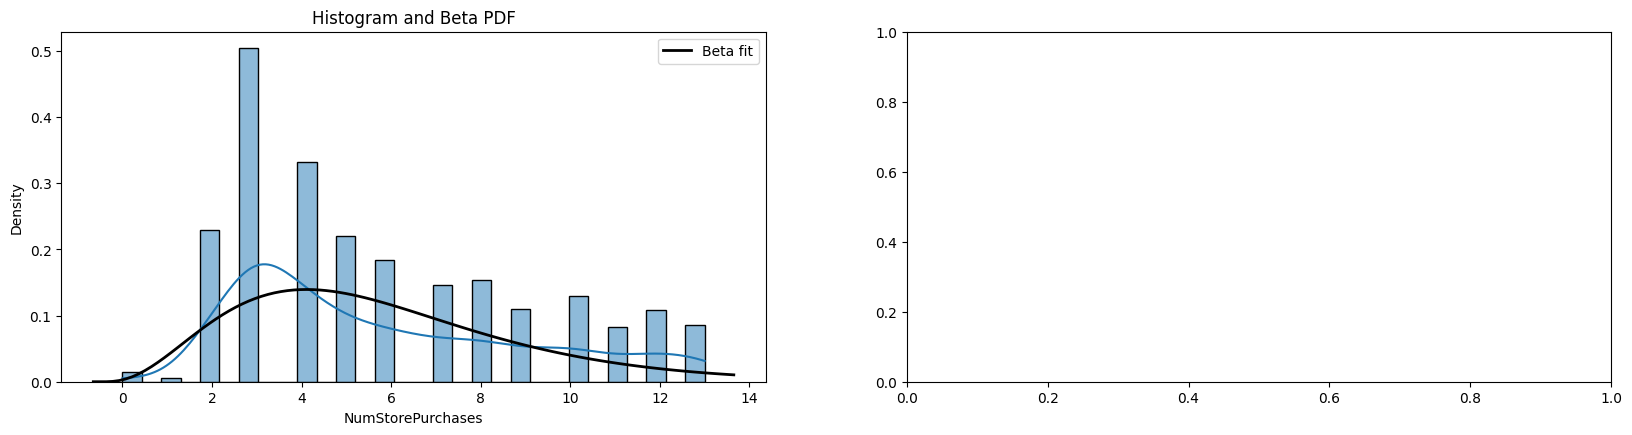

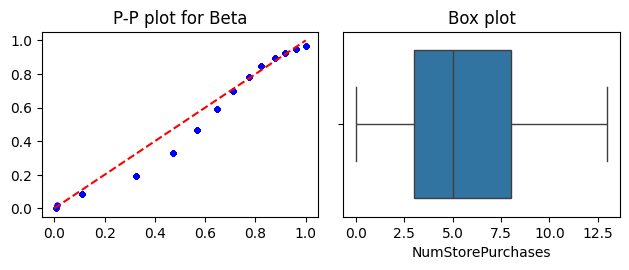

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/p

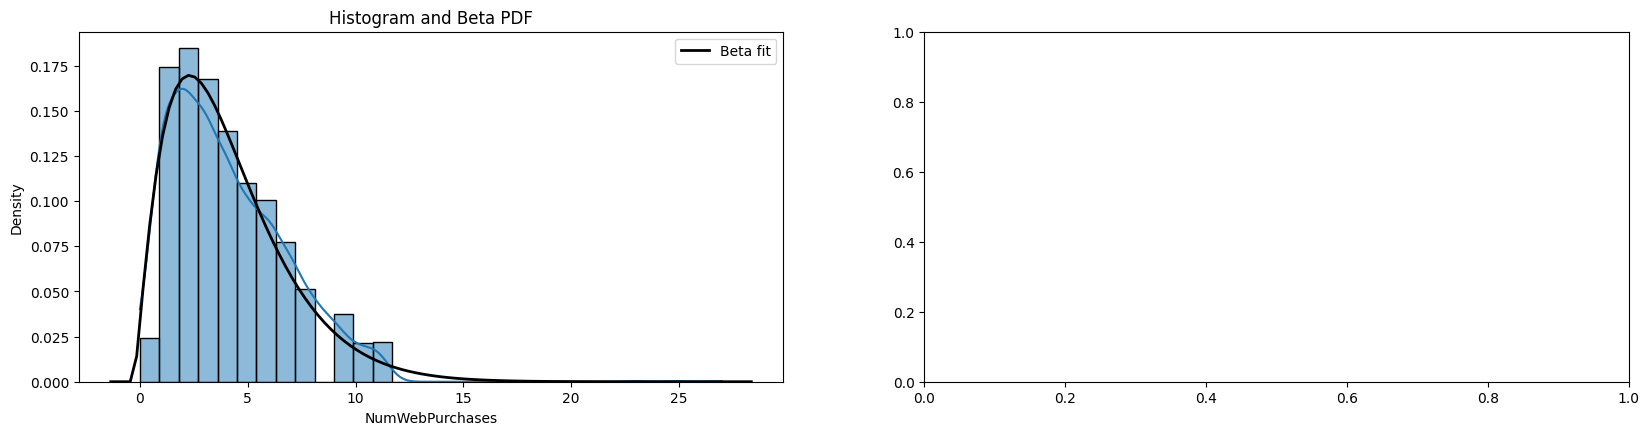

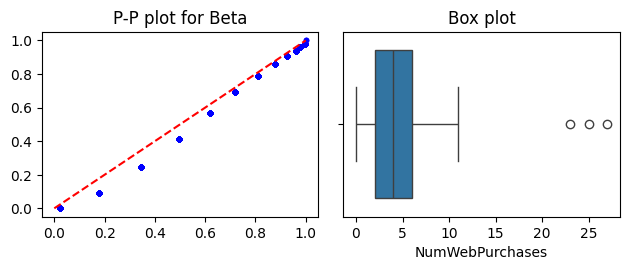

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


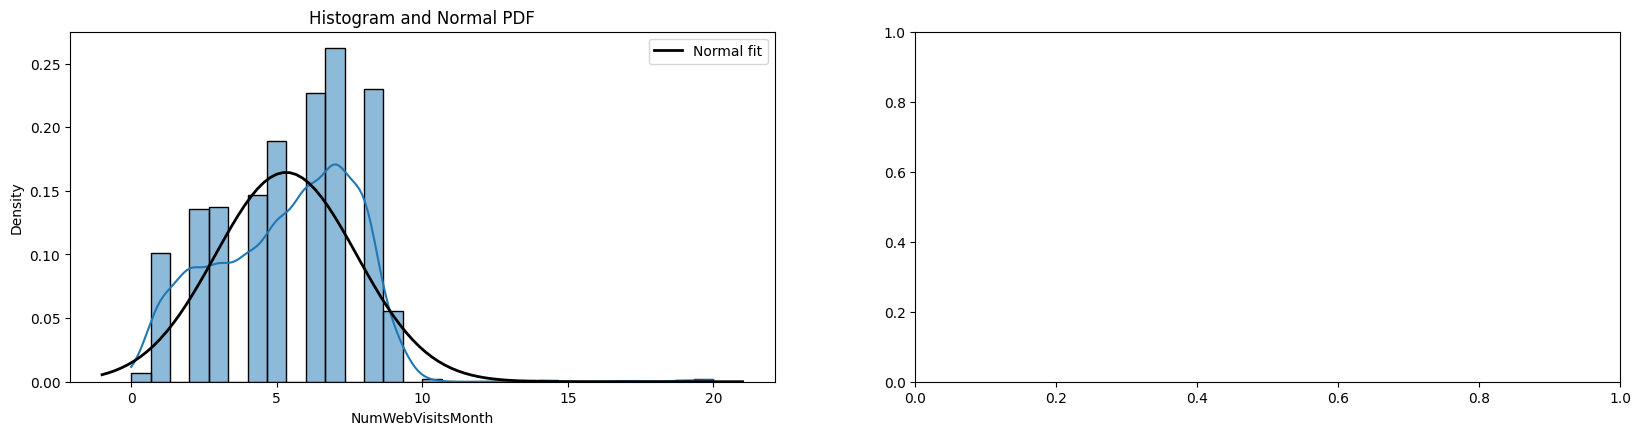

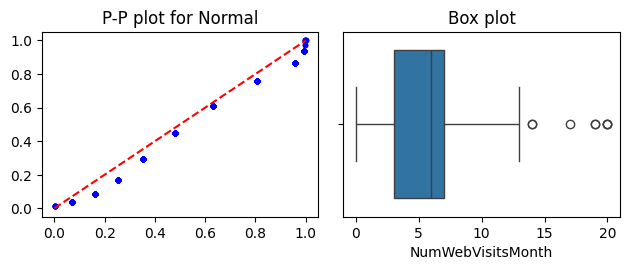

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-11-dba5c778fc33>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


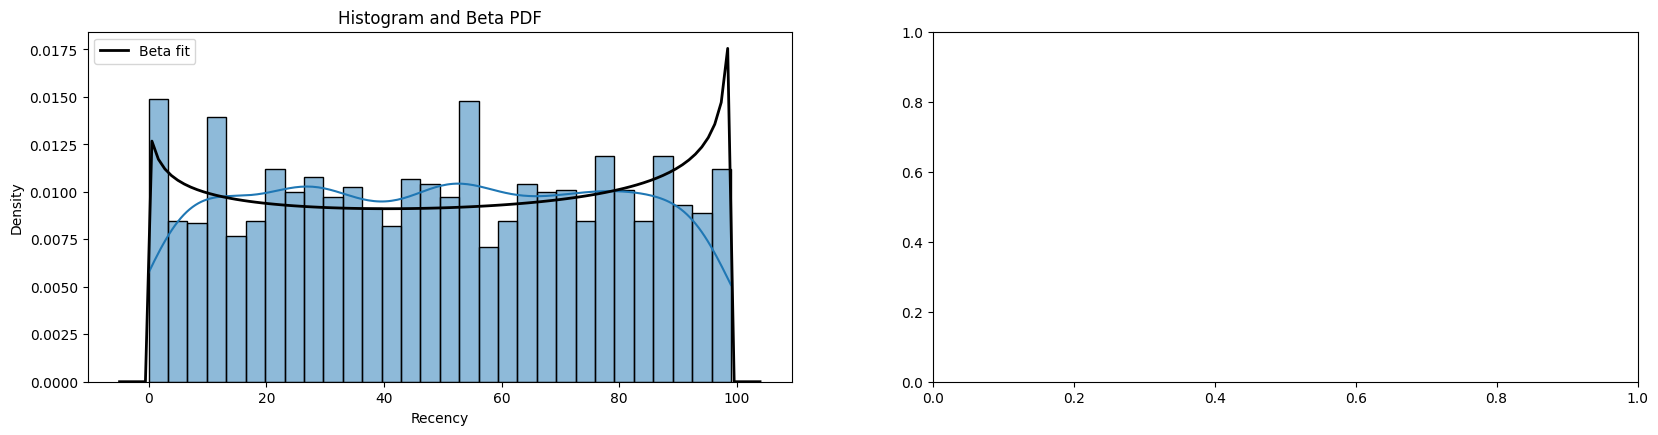

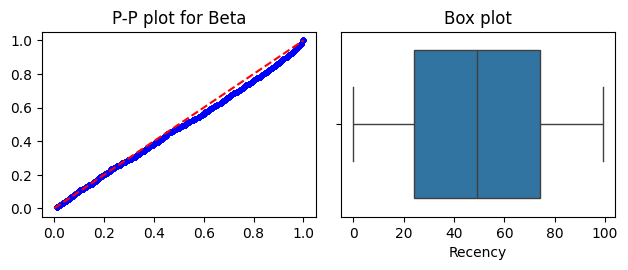

╒════╤═════════════════════╤═════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╤══════════════════════════════╤══════════════════════════╤════════════════════════╕
│    │ Variable            │ Best Fit Distribution   │ Best Fit Parameters                                                                 │   Kolmogorov-Smirnov Test Stat │   Kolmogorov-Smirnov p-value │   Shapiro-Wilk Test Stat │   Shapiro-Wilk p-value │
╞════╪═════════════════════╪═════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════╪════════════════════════════════╪══════════════════════════════╪══════════════════════════╪════════════════════════╡
│  0 │ Income              │ Student's t             │ (13.965244173052696, 51759.06830253365, 20331.562423124844)                         │                      0.0541436 │                 4.89129e-05  │                 0.777053

In [ ]:
from scipy.stats import norm, expon, poisson, gamma, lognorm, beta, t, kstest, shapiro
import statsmodels.api as sm

# List of key numerical variables
numerical_vars = [
     'Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits',
    'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth', 'Recency'
]

# Define function to plot histogram, Q-Q plot, P-P plot, and Box plot
def plot_distributions(data, dist_name, dist, dist_params):
    plt.figure(figsize=(20, 10))

    # Histogram with PDF
    plt.subplot(2, 2, 1)
    sns.histplot(data, kde=True, stat='density', bins=30)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = dist.pdf(x, *dist_params)
    plt.plot(x, p, 'k', linewidth=2, label=f'{dist_name} fit')
    plt.title(f'Histogram and {dist_name} PDF')
    plt.legend()

    # Q-Q plot
    plt.subplot(2, 2, 2)
    sm.qqplot(data, dist=dist, line='45', fit=True)
    plt.title(f'Q-Q plot for {dist_name}')

    # P-P plot
    plt.subplot(2, 2, 3)
    ecdf = sm.distributions.ECDF(data)
    cdf = dist.cdf(np.sort(data), *dist_params)
    plt.plot(ecdf(np.sort(data)), cdf, 'bo', markersize=3)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'P-P plot for {dist_name}')

    # Box plot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=data)
    plt.title('Box plot')

    plt.tight_layout()
    plt.show()

# Define function to perform Shapiro-Wilk test
def perform_shapiro_test(data):
    stat, p = shapiro(data)
    return stat, p

# Define function to perform Kolmogorov-Smirnov test
def perform_ks_test(data, dist, *params):
    stat, p = kstest(data, dist.cdf, args=params)
    return stat, p

# List of distributions to test
distributions = {
    'Normal': norm,
    'Exponential': expon,
    'Poisson': poisson,
    'Gamma': gamma,
    'Lognormal': lognorm,
    'Beta': beta,
    'Student\'s t': t
}

# Dictionary to store results
results = []

# Iterate over numerical variables
for var in numerical_vars:
    if var in df.columns:
        data = df[var].dropna()

        best_fit = None
        best_p_value = -1
        best_dist_name = ''
        best_dist_params = None

        # Fit each distribution and calculate goodness-of-fit
        for dist_name, dist in distributions.items():
            if dist_name == 'Poisson':
                params = (np.mean(data),)
            else:
                params = dist.fit(data)

            ks_stat, ks_p = perform_ks_test(data, dist, *params)

            if ks_p > best_p_value:
                best_fit = dist
                best_p_value = ks_p
                best_dist_name = dist_name
                best_dist_params = params

        # Visual Inspection: Plot histogram, Q-Q plot, P-P plot, and Box plot for best-fit distribution
        if best_fit:
            plot_distributions(data, best_dist_name, best_fit, best_dist_params)

        # Statistical Tests for Normal distribution specifically
        norm_params = norm.fit(data)
        shapiro_stat, shapiro_p = perform_shapiro_test(data)
        ks_stat, ks_p = perform_ks_test(data, norm, *norm_params)

        # Store results
        result = {
            'Variable': var,
            'Best Fit Distribution': best_dist_name,
            'Best Fit Parameters': best_dist_params,
            'Kolmogorov-Smirnov Test Stat': ks_stat,
            'Kolmogorov-Smirnov p-value': best_p_value,
            'Shapiro-Wilk Test Stat': shapiro_stat,
            'Shapiro-Wilk p-value': shapiro_p
        }
        results.append(result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results DataFrame as a table
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


In [ ]:


# Calculate expected values and probabilities
for i, row in results_df.iterrows():
    var = row['Variable']
    best_dist_name = row['Best Fit Distribution']
    best_dist_params = row['Best Fit Parameters']

    if best_dist_name == 'Normal':
        expected_value = best_dist_params[0]  # mean
        probability = norm.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Exponential':
        expected_value = 1 / best_dist_params[1]  # 1/rate
        probability = expon.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Poisson':
        expected_value = best_dist_params[0]  # lambda
        probability = poisson.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Gamma':
        expected_value = best_dist_params[0] * best_dist_params[2]  # shape * scale
        probability = gamma.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Lognormal':
        expected_value = np.exp(best_dist_params[0] + (best_dist_params[1]**2) / 2)  # exp(mu + sigma^2 / 2)
        probability = lognorm.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Beta':
        expected_value = best_dist_params[0] / (best_dist_params[0] + best_dist_params[1])  # alpha / (alpha + beta)
        probability = beta.cdf(expected_value, *best_dist_params)
    elif best_dist_name == 'Student\'s t':
        expected_value = 0  # mean of t-distribution is 0
        probability = t.cdf(expected_value, *best_dist_params)
    else:
        expected_value = None
        probability = None

    # Update the DataFrame with expected values and probabilities
    results_df.at[i, 'Expected Value'] = expected_value
    results_df.at[i, 'Probability (CDF at Expected Value)'] = probability

# Print the updated results DataFrame as a table
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤═════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════╤══════════════════════════════╤══════════════════════════╤════════════════════════╤══════════════════╤═══════════════════════════════════════╕
│    │ Variable            │ Best Fit Distribution   │ Best Fit Parameters                                                                 │   Kolmogorov-Smirnov Test Stat │   Kolmogorov-Smirnov p-value │   Shapiro-Wilk Test Stat │   Shapiro-Wilk p-value │   Expected Value │   Probability (CDF at Expected Value) │
╞════╪═════════════════════╪═════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════╪════════════════════════════════╪══════════════════════════════╪══════════════════════════╪════════════════════════╪══════════════════╪═══════════════════════════════════════╡
│  0 │ Income              │ Student's t            

##customer segmentation and exploring relationship between variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for segmentation
features = df[['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits',
               'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
               'NumWebVisitsMonth', 'Recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Income  MntFishProducts  MntMeatProducts  MntFruits  \
Cluster                                                              
0        76613.754967       100.304636       445.543046  68.923841   
1        34908.826341         7.090732        22.038049   4.785366   
2        57450.858603        26.495741       133.502555  20.221465   

         MntSweetProducts    MntWines  MntGoldProds  NumDealsPurchases  \
Cluster                                                                  
0               70.880795  593.163907     78.849338           1.405629   
1                5.043902   41.269268     14.835122           1.982439   
2               20.296422  469.354344     58.936968           3.863714   

         NumCatalogPurchases  NumStorePurchases  NumWebPurchases  \
Cluster                                                            
0                   5.985099           8.456954         5.286424   
1                   0.546341           3.208780         2.071220   
2     

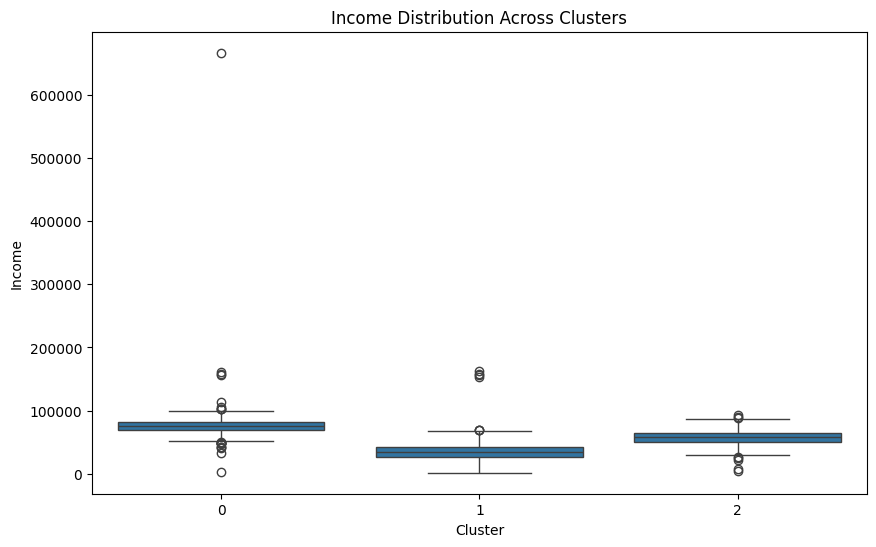

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Assign the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Select columns for clustering summary (numeric only)
summary_columns = ['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits',
                   'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
                   'NumWebVisitsMonth', 'Recency', 'Cluster']

# Calculate mean for numeric columns grouped by 'Cluster'
cluster_summary = df[summary_columns].groupby('Cluster').mean()
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df)
plt.title('Income Distribution Across Clusters')
plt.show()


In [ ]:
cluster_labels = {
    0: "High Income, Frequent Buyers",
    1: "Low Income, Occasional Buyers",
    2: "Moderate Income, Average Buyers"
}

# Print summary with descriptive labels
for cluster_id, label in cluster_labels.items():
    print(f"Cluster {cluster_id} ({label}):")
    print(cluster_summary.loc[cluster_id])
    print()
# Count samples in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)


Cluster 0 (High Income, Frequent Buyers):
Income                 76613.754967
MntFishProducts          100.304636
MntMeatProducts          445.543046
MntFruits                 68.923841
MntSweetProducts          70.880795
MntWines                 593.163907
MntGoldProds              78.849338
NumDealsPurchases          1.405629
NumCatalogPurchases        5.985099
NumStorePurchases          8.456954
NumWebPurchases            5.286424
NumWebVisitsMonth          2.860927
Recency                   49.319536
Name: 0, dtype: float64

Cluster 1 (Low Income, Occasional Buyers):
Income                 34908.826341
MntFishProducts            7.090732
MntMeatProducts           22.038049
MntFruits                  4.785366
MntSweetProducts           5.043902
MntWines                  41.269268
MntGoldProds              14.835122
NumDealsPurchases          1.982439
NumCatalogPurchases        0.546341
NumStorePurchases          3.208780
NumWebPurchases            2.071220
NumWebVisitsMonth         

<ipython-input-16-97b71bd24a18>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


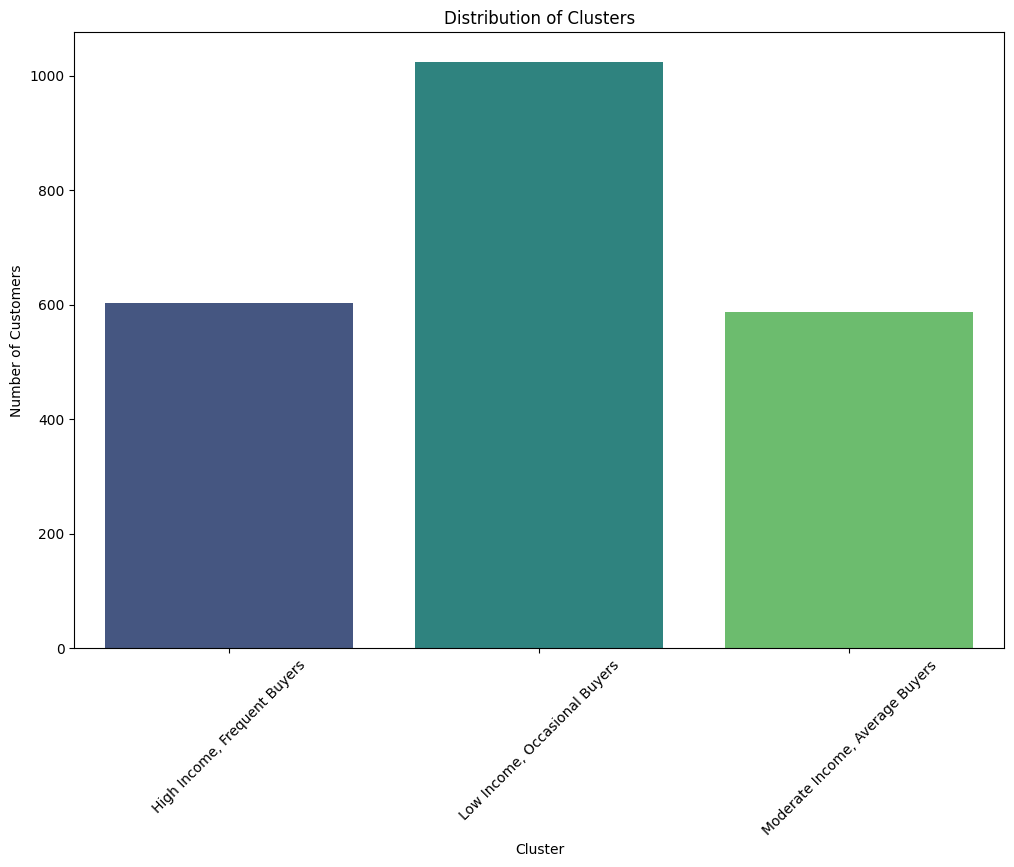

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assign descriptive labels to clusters in the DataFrame
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Count samples in each cluster
cluster_counts = df['Cluster_Label'].value_counts().sort_index()

# Plotting bar plot with cluster labels and descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-aae00dc32949>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='viridis', ax=axes[0, 1])
<ipython-input-27-aae00dc32949>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_ages.index, y=top_20_ages.values, palette='viridis', ax=axes[1, 0])
<ipython-input-27-aae00dc32949>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kids', data=df, palette='viridis', ax=axes[1, 1])


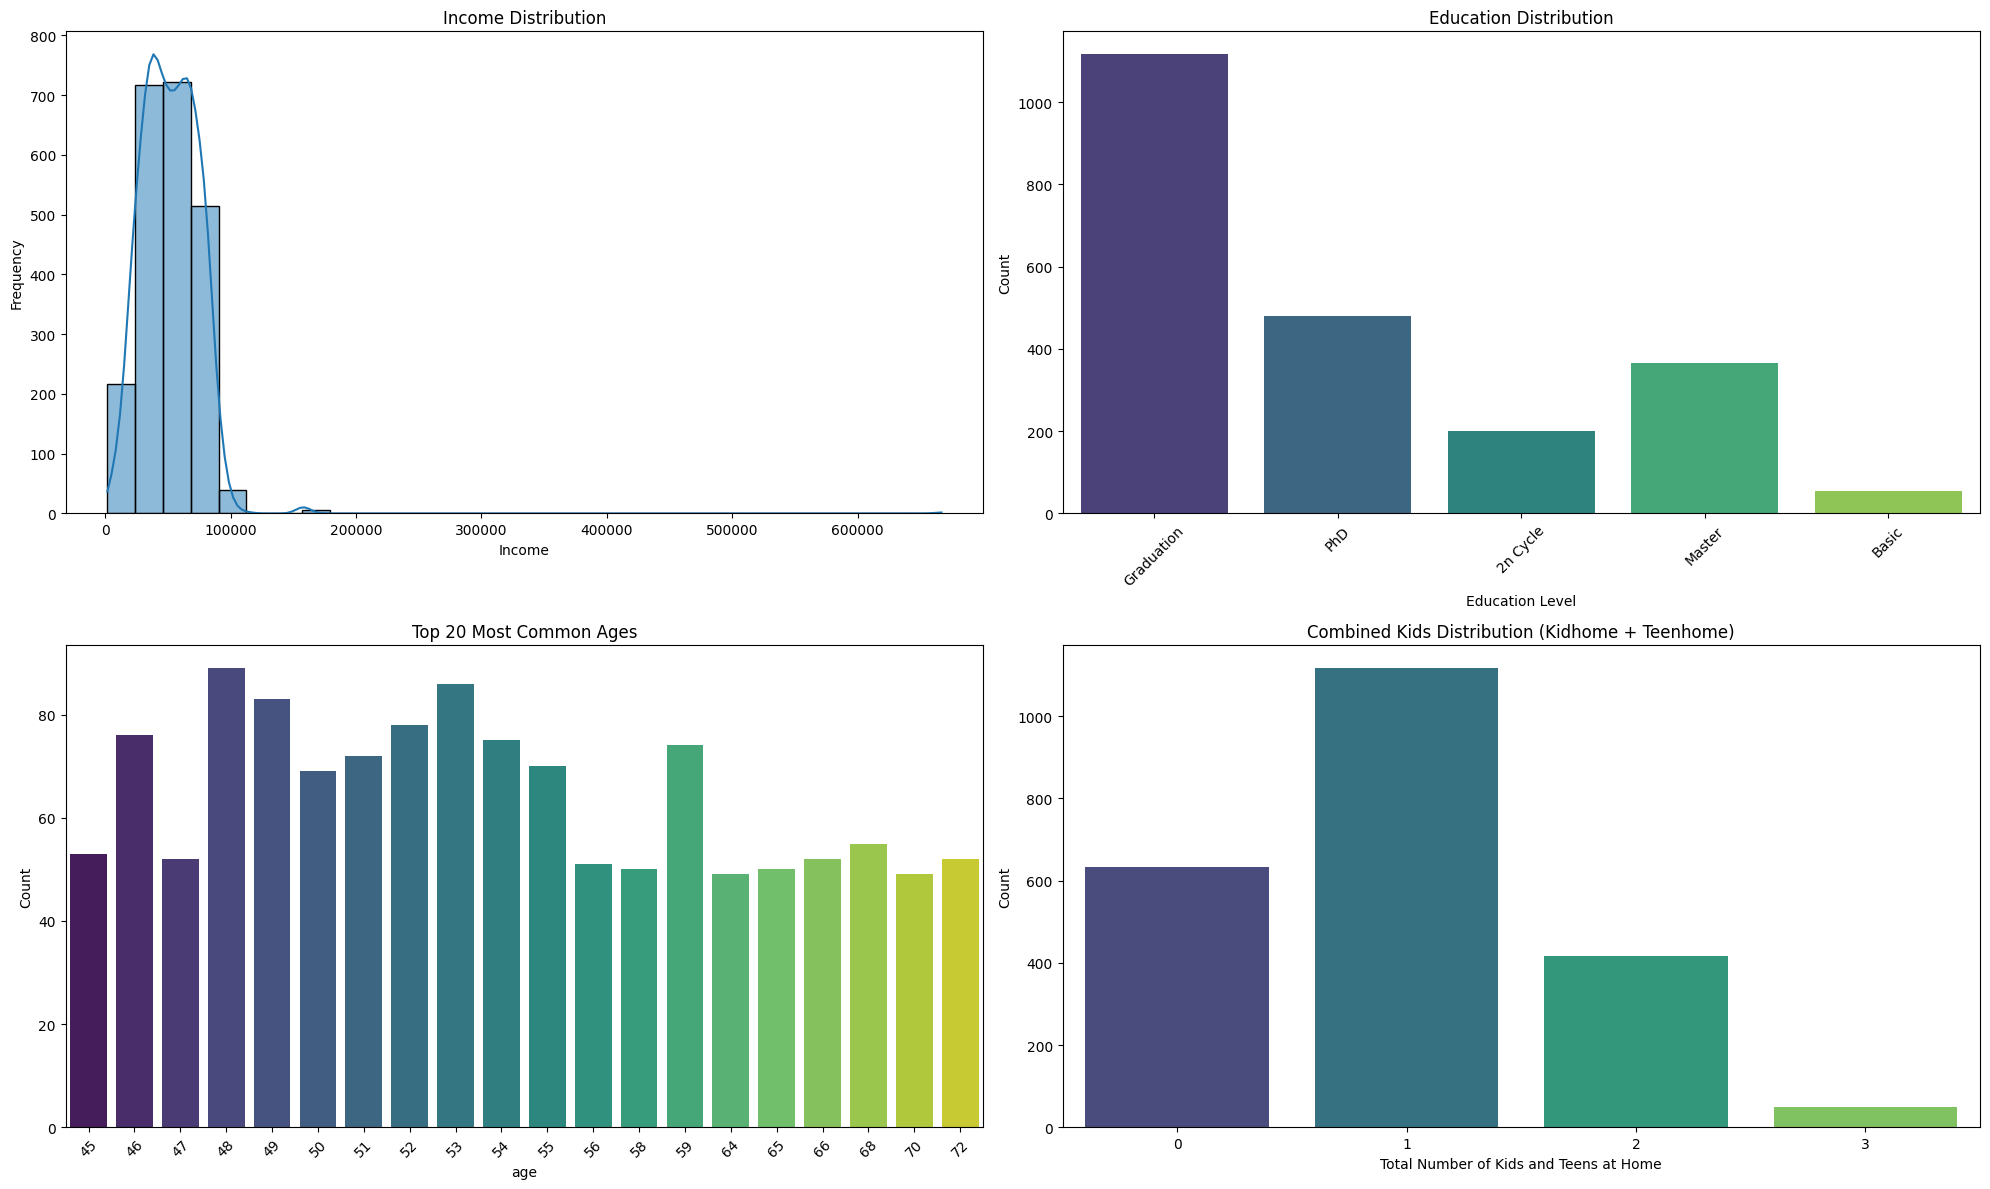

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine Kidhome and Teenhome into a single column
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Visualize Income Distribution
sns.histplot(df['Income'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')

# Visualize Education Distribution
sns.countplot(x='Education', data=df, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Education Distribution')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualize Top 20 Age Distribution
# Calculate the actual age
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Find the top 20 most common ages
age_counts = df['Age'].value_counts().sort_values(ascending=False)
top_20_ages = age_counts.head(20)


sns.barplot(x=top_20_ages.index, y=top_20_ages.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 20 Most Common Ages')
axes[1, 0].set_xlabel('age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Visualize Combined Kids Distribution
sns.countplot(x='Kids', data=df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Combined Kids Distribution (Kidhome + Teenhome)')
axes[1, 1].set_xlabel('Total Number of Kids and Teens at Home')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


                   With Kids  Without Kids
MntFishProducts    22.049905     76.619273
MntMeatProducts    85.473784    370.865719
MntFruits          15.991788     52.274882
MntSweetProducts   16.571699     53.180095
MntWines          231.922299    488.072670
MntGoldProds       35.859760     64.235387


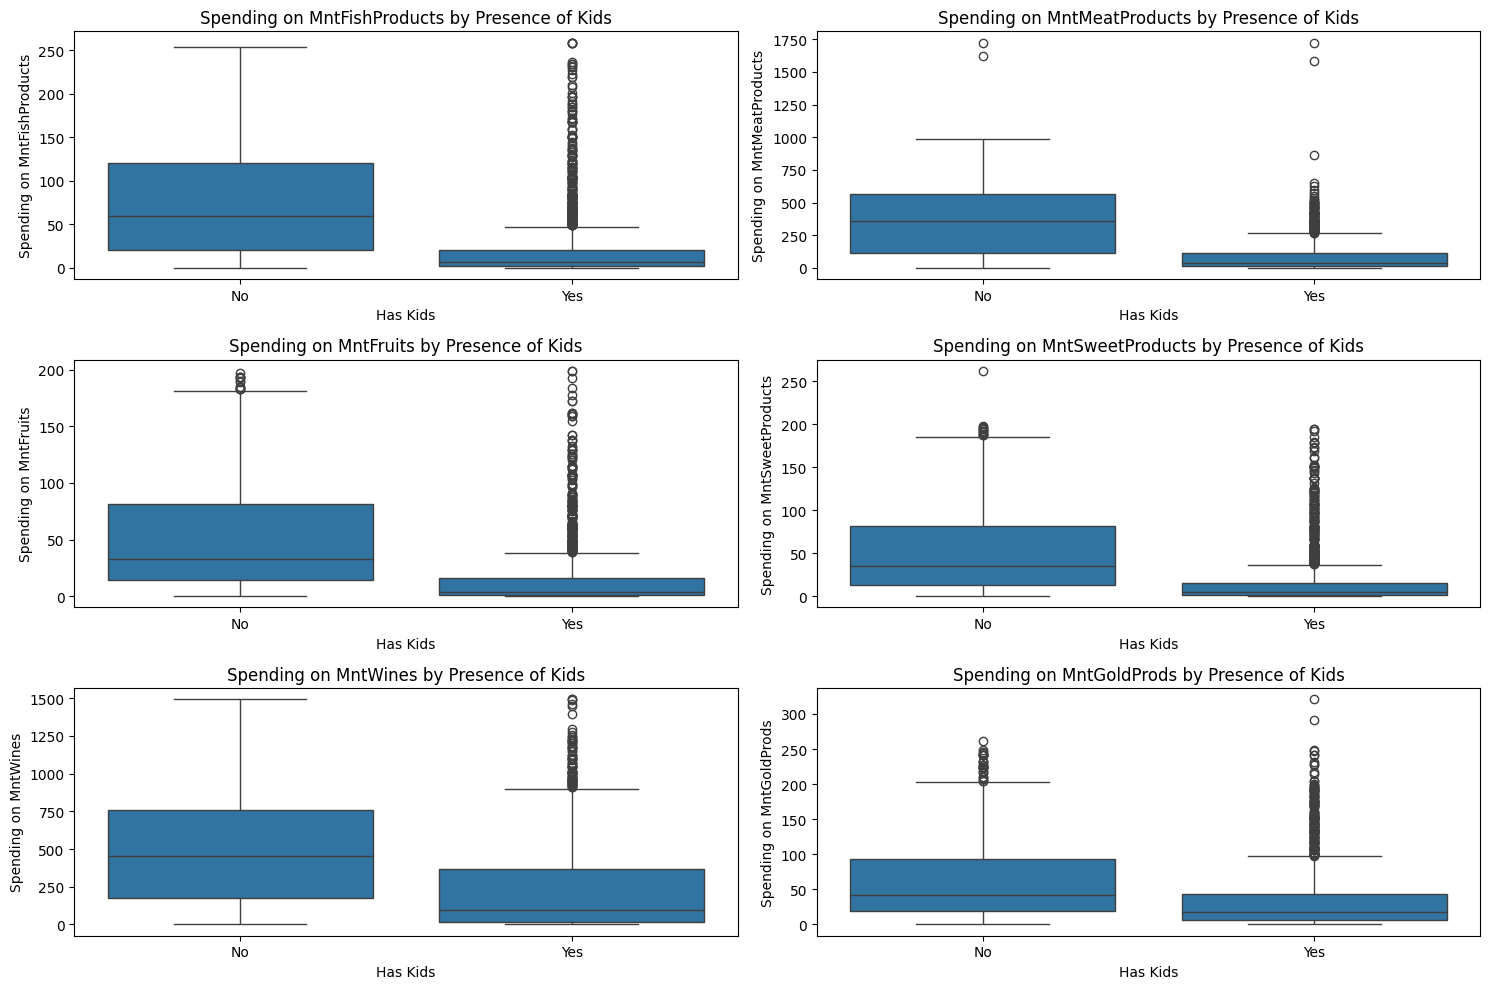

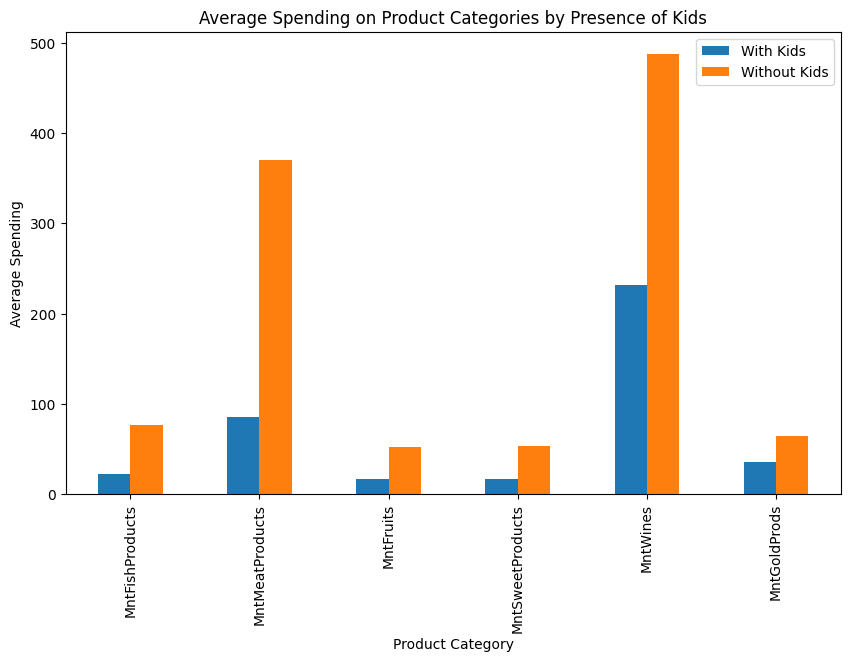

In [ ]:
# Create a new column 'HasKids'
df['HasKids'] = (df['Kidhome'] + df['Teenhome']) > 0

# Calculate mean spending on different product categories for customers with and without kids
spending_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
mean_spending_with_kids = df[df['HasKids']][spending_columns].mean()
mean_spending_without_kids = df[~df['HasKids']][spending_columns].mean()

summary_stats = pd.DataFrame({
    'With Kids': mean_spending_with_kids,
    'Without Kids': mean_spending_without_kids
})
print(summary_stats)

# Create box plots for spending patterns
plt.figure(figsize=(15, 10))

for i, col in enumerate(spending_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='HasKids', y=col, data=df)
    plt.title(f'Spending on {col} by Presence of Kids')
    plt.xlabel('Has Kids')
    plt.ylabel(f'Spending on {col}')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Create bar plots for mean spending
summary_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending on Product Categories by Presence of Kids')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.show()


MntWines            676083
MntMeatProducts     370063
MntGoldProds         97427
MntFishProducts      83405
MntSweetProducts     59896
MntFruits            58405
dtype: int64


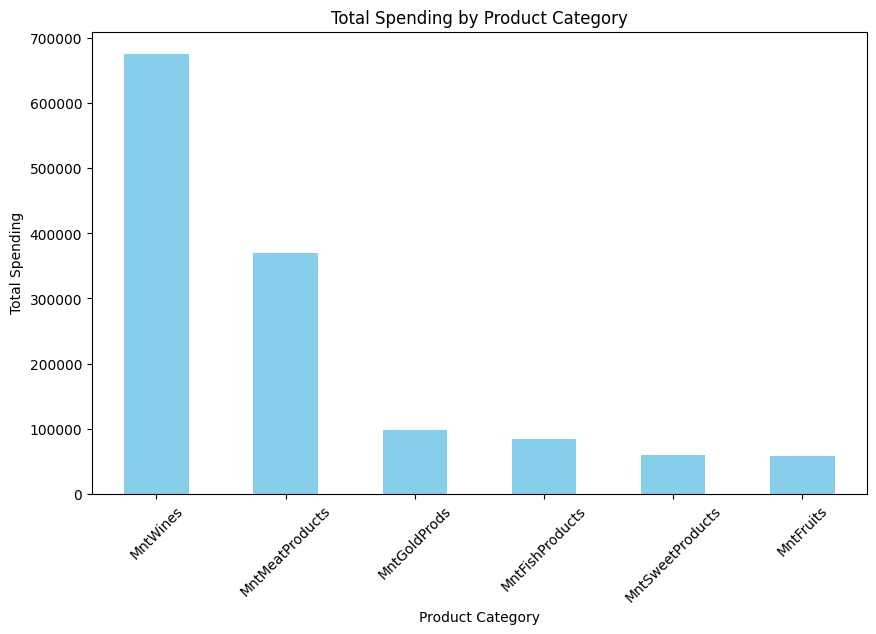

In [ ]:
# List of product spending columns
product_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits',
                   'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Calculate total spending for each product category
total_spending = df[product_columns].sum()

# Sort total spending in descending order
sorted_total_spending = total_spending.sort_values(ascending=False)
print(sorted_total_spending)

# Plot the total spending for each product category
plt.figure(figsize=(10, 6))
sorted_total_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


<ipython-input-20-ce7cfab186e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='NumDealsPurchases', data=cluster_discount_purchases, palette='viridis')


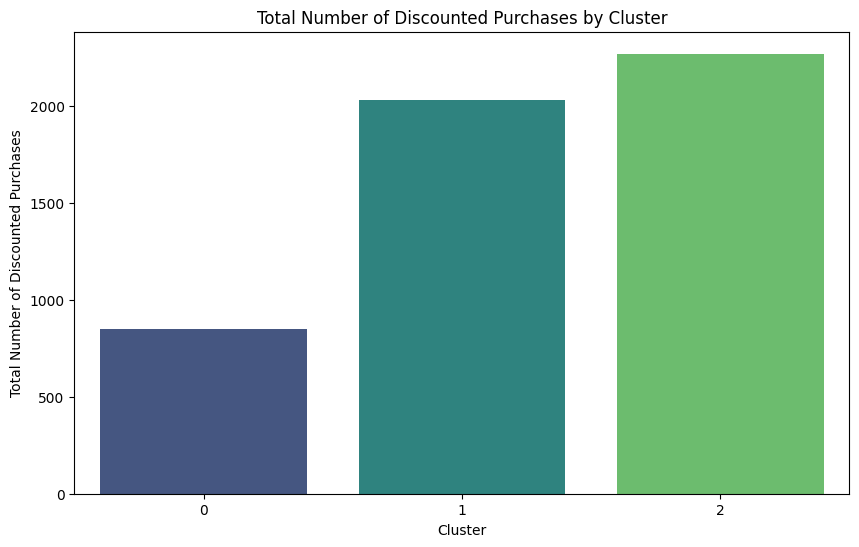

In [ ]:
# Convert 'NumDealsPurchases' to a numeric type in case it's not
df['NumDealsPurchases'] = pd.to_numeric(df['NumDealsPurchases'], errors='coerce')

# Calculate the total number of discounted purchases for each cluster
cluster_discount_purchases = df.groupby('Cluster')['NumDealsPurchases'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='NumDealsPurchases', data=cluster_discount_purchases, palette='viridis')
plt.title('Total Number of Discounted Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Discounted Purchases')
plt.show()


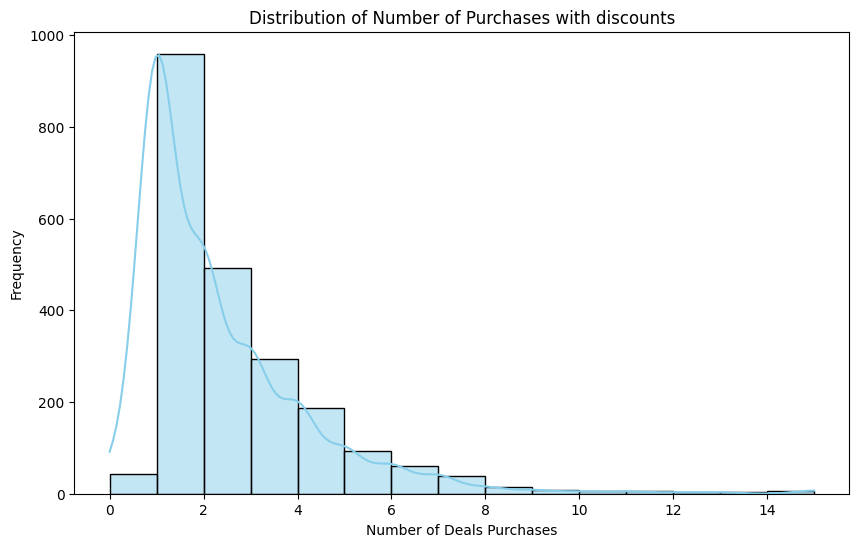

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NumDealsPurchases'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Number of Purchases with discounts')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Frequency')
plt.show()


       NumStorePurchases  NumWebPurchases
count        2216.000000      2216.000000
mean            5.800993         4.085289
std             3.250785         2.740951
min             0.000000         0.000000
25%             3.000000         2.000000
50%             5.000000         4.000000
75%             8.000000         6.000000
max            13.000000        27.000000


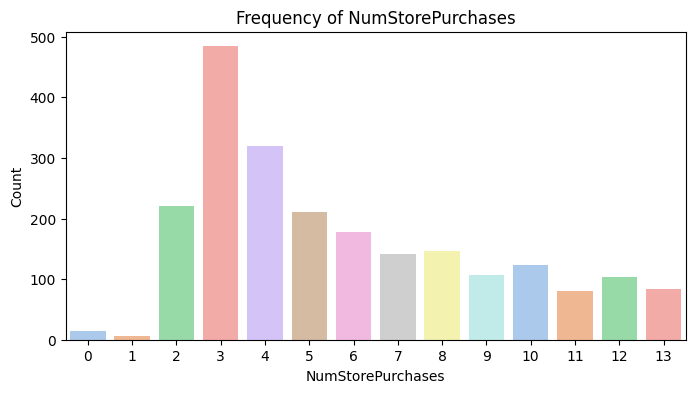

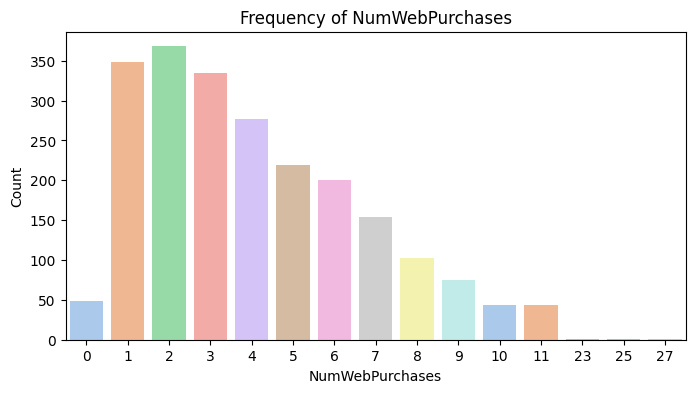

In [ ]:
columns_to_analyze = [
     'NumStorePurchases',
    'NumWebPurchases'
]

print(df[columns_to_analyze].describe())

def bar_plot(column_name):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column_name, data=df, hue=column_name, palette='pastel', legend=False)
    plt.title(f'Frequency of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

# Visualize each column
for column in columns_to_analyze:
    bar_plot(column)


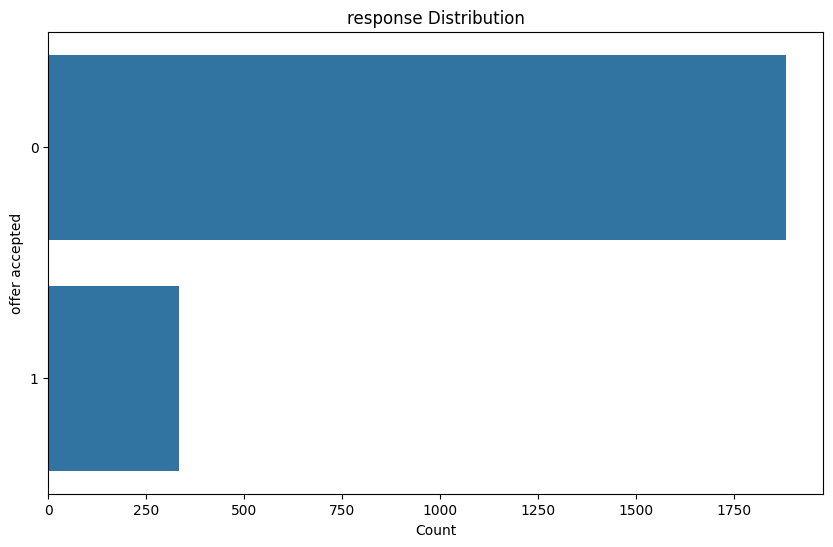

In [ ]:
if 'Response' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['Response'], order=df['Response'].value_counts().index)
    plt.title('response Distribution')
    plt.xlabel('Count')
    plt.ylabel('offer accepted')
    plt.show()

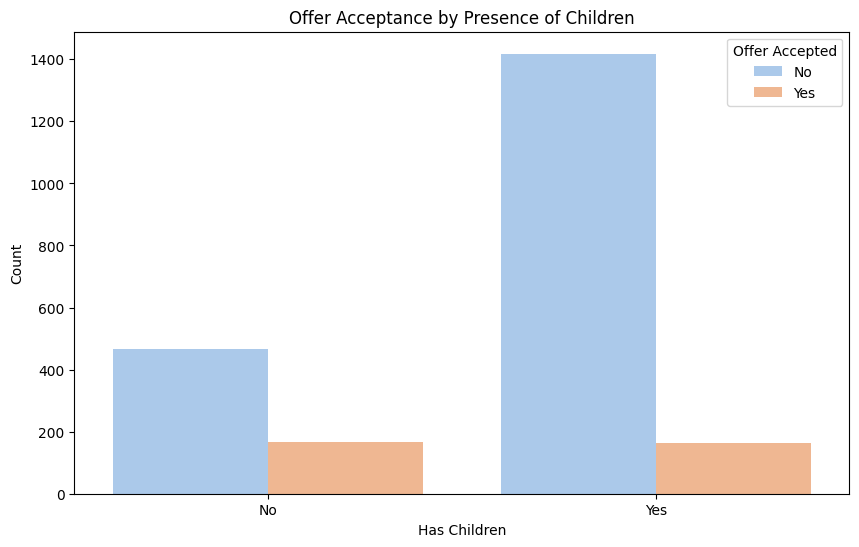

In [ ]:
# Creating a new column that represents the presence of children
df['Has_Children'] = df['Kidhome'] + df['Teenhome'] > 0

# Visualizing response distribution by presence of children
if 'Response' in df.columns and 'Has_Children' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Has_Children', hue='Response', data=df, palette='pastel')
    plt.title('Offer Acceptance by Presence of Children')
    plt.xlabel('Has Children')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(title='Offer Accepted', labels=['No', 'Yes'])
    plt.show()


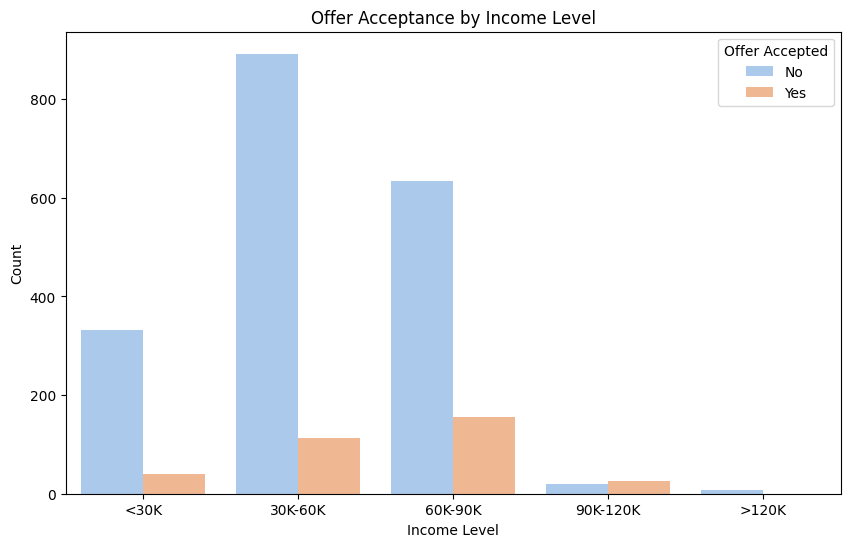

In [ ]:
# Creating income bins
income_bins = [0, 30000, 60000, 90000, 120000, df['Income'].max()]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '>120K']
df['Income_Bin'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Visualizing response distribution by Income level
if 'Response' in df.columns and 'Income_Bin' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Income_Bin', hue='Response', data=df, palette='pastel')
    plt.title('Offer Acceptance by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('Count')
    plt.legend(title='Offer Accepted', labels=['No', 'Yes'])
    plt.show()


##conclusion and insights

CUSTOMER SEGMENTS



*  Low Income, Occasional Buyers is the largest segment, with 1025 customers. This suggests that the majority of the customers fall into the low-income and occasional buyer category. This could indicate that a significant portion of the customer base is more price-sensitive and possibly less loyal, making them more likely to respond to promotions, discounts, and marketing efforts aimed at increasing purchase frequency.

 Offers such as discounts, bundle deals, and loyalty programs might encourage more frequent shopping.



* High Income, Frequent Buyers is the next largest segment, with 604 customers.
 These customers are likely to have higher spending power and are frequent purchasers, making them valuable for high-margin products and premium services. They are probably the most profitable segment and could be targeted for loyalty programs, exclusive offers, and high-end product promotions.

 offering premium services, exclusive access to new products, and personalized experiences to maintain and increase their spending.



*  Moderate Income, Average Buyers is the smallest segment, with 587 customers.
This group is characterized by moderate income and average purchasing behavior. They might be more stable and consistent in their purchasing habits compared to the other two segments. Targeting them with value propositions and maintaining their satisfaction could be key to sustaining their loyalty.

 ensure consistent quality and value in your offerings. Regular engagement through newsletters, updates, given the fact that they make the most discount purchases,maintaining the discount offers would be feasible.


  CUSTOMERS WITH AND WITHOUT KIDS


* customers without kids seem to make up most of the consumers.  
customers without kids generally have fewer financial obligations related to childcare, education, and related expenses. This can lead to higher discretionary income, which they might allocate to non-essential purchases, entertainment, travel, and personal interests. Understanding this can help in creating more targeted marketing campaigns.




* Attracting customers with kids requires a tailored approach that considers their specific needs, preferences, and challenges.

 Stock products that cater to families, such as children's clothing, toys, educational materials, and family-sized food packages.

 Offer services that appeal to families, such as kid-friendly meal options, family discounts, or special events for children.

 Use digital marketing platforms to target ads to parents. Focus on social media channels and parenting blogs where parents are likely to spend time.

 Offer discounts and promotions that are attractive to families, such as “buy one get one free” offers on children's items, or family bundle deals.

 Make the store family-friendly with amenities such as play areas, child seating, and changing facilities.

 PROMOTE FRUITS AND SWEETS

* since wine is the most selling product,Create bundles that include wine paired with fruits and sweets. Highlight how these combinations enhance the wine-tasting experience.
 Offer discounts on fruits and sweets when purchased with wine. For example, Buy 2 bottles of wine and get 20% off on fruits and sweets.

 Organize regular wine tasting events, pairing different wines with various fruits and sweets. This not only promotes these products but also enhances customer engagement.

 Seasonal Products: Introduce seasonal fruits and sweets that might be more appealing during certain times of the year (e.g., summer fruits, holiday sweets).

 Health-Conscious Options: Offer healthier versions of sweets and high-quality, organic fruits to attract health-conscious customers.

 IN STORE AND WEB PURCHASE

* Ensure the branding is consistent across both online and offline channels as both bring in consumers with little difference in number. Use the same color schemes, logos, and messaging to create a cohesive brand experience.Encourage in-store customers to visit your website for exclusive online deals and vice versa.
   
   promote instore pick up from online orders.make the online experiance of customers smooth and hassle free.

 CREATE COMPELLING OFFERS

* The response from customers is considerably low ,Use customer data to create personalized offers. Customers are more likely to respond to offers that feel relevant to their needs.

 Create a sense of urgency with limited-time offers. This encourages customers to act quickly rather than postponing their decision.Offer loyalty points.

 Conduct A/B tests to find the most effective types of offers, messaging, and channels.

 Place eye-catching signs at key locations within the store, such as the entrance and checkout, promoting the latest offers.
 promote offers through social media campaigns.

